# Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

- ***R&D Spend : Research and devolop spend in the past few years***
- ***Administration : spend on administration in the past few years***
- ***Marketing Spend : spend on Marketing in the past few years***
- ***State : states from which data is collected***
- ***Profit : profit of each state in the past few years***

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')

### Adding Dataset

In [2]:
st = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_05_Multi%20Linear%20Regression/Dataset/50_Startups.csv')
st.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [3]:
st.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
st.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Visualizing The Data

<AxesSubplot:xlabel='Profit'>

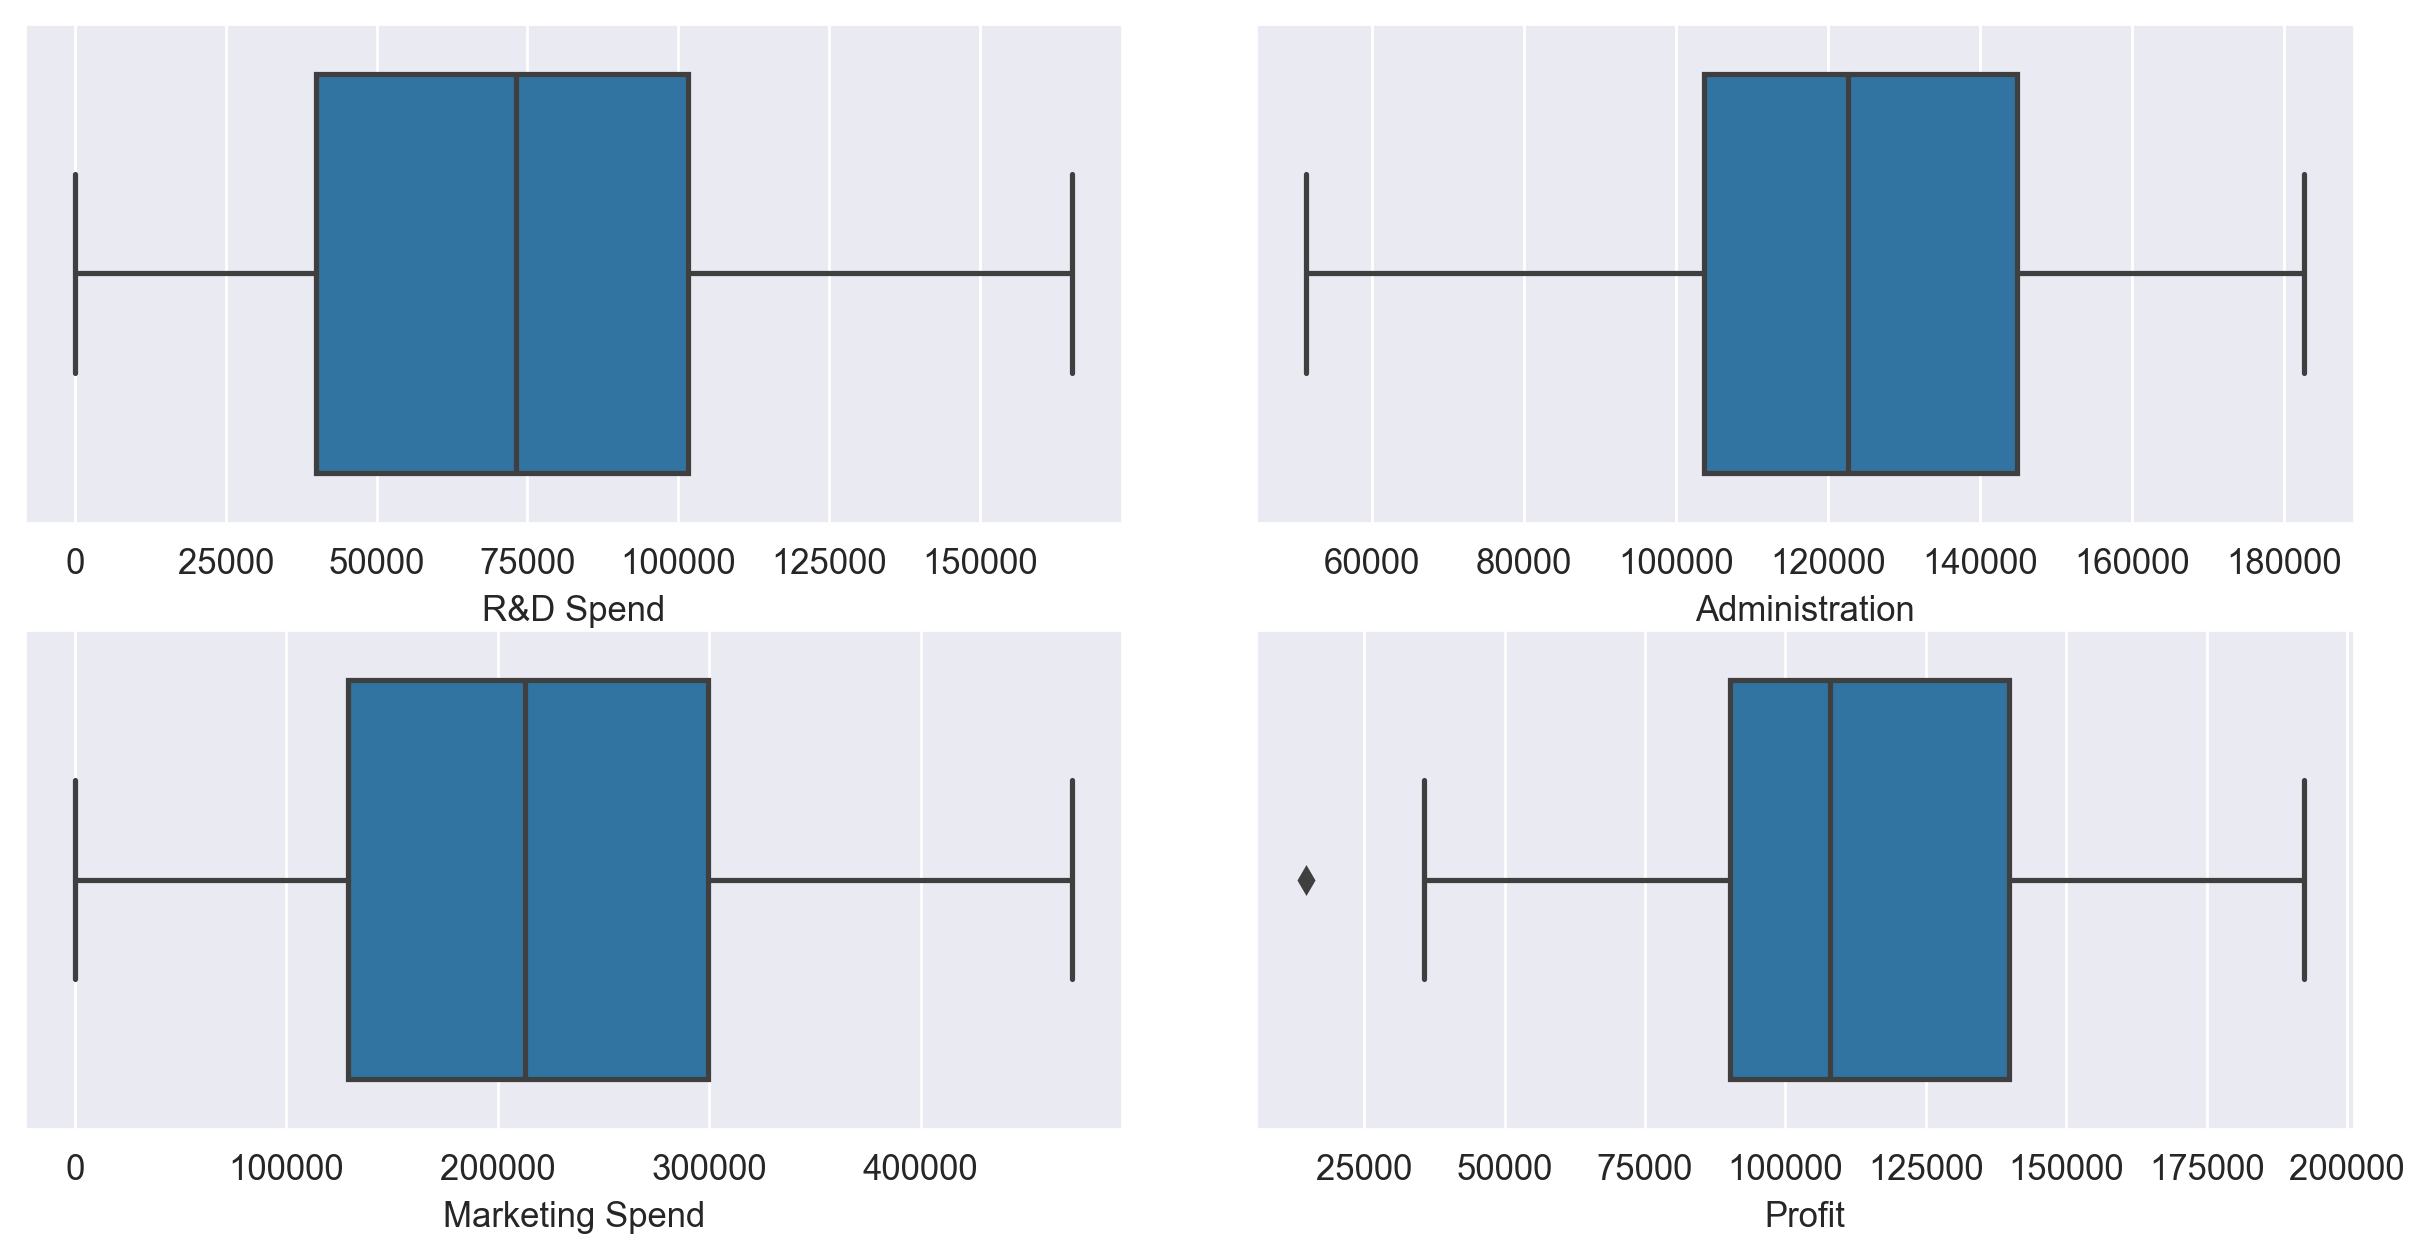

In [6]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(st['R&D Spend'], ax = ax[0,0])
sns.boxplot(st['Administration'], ax = ax[0,1])
sns.boxplot(st['Marketing Spend'], ax = ax[1,0])
sns.boxplot(st['Profit'], ax = ax[1,1])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

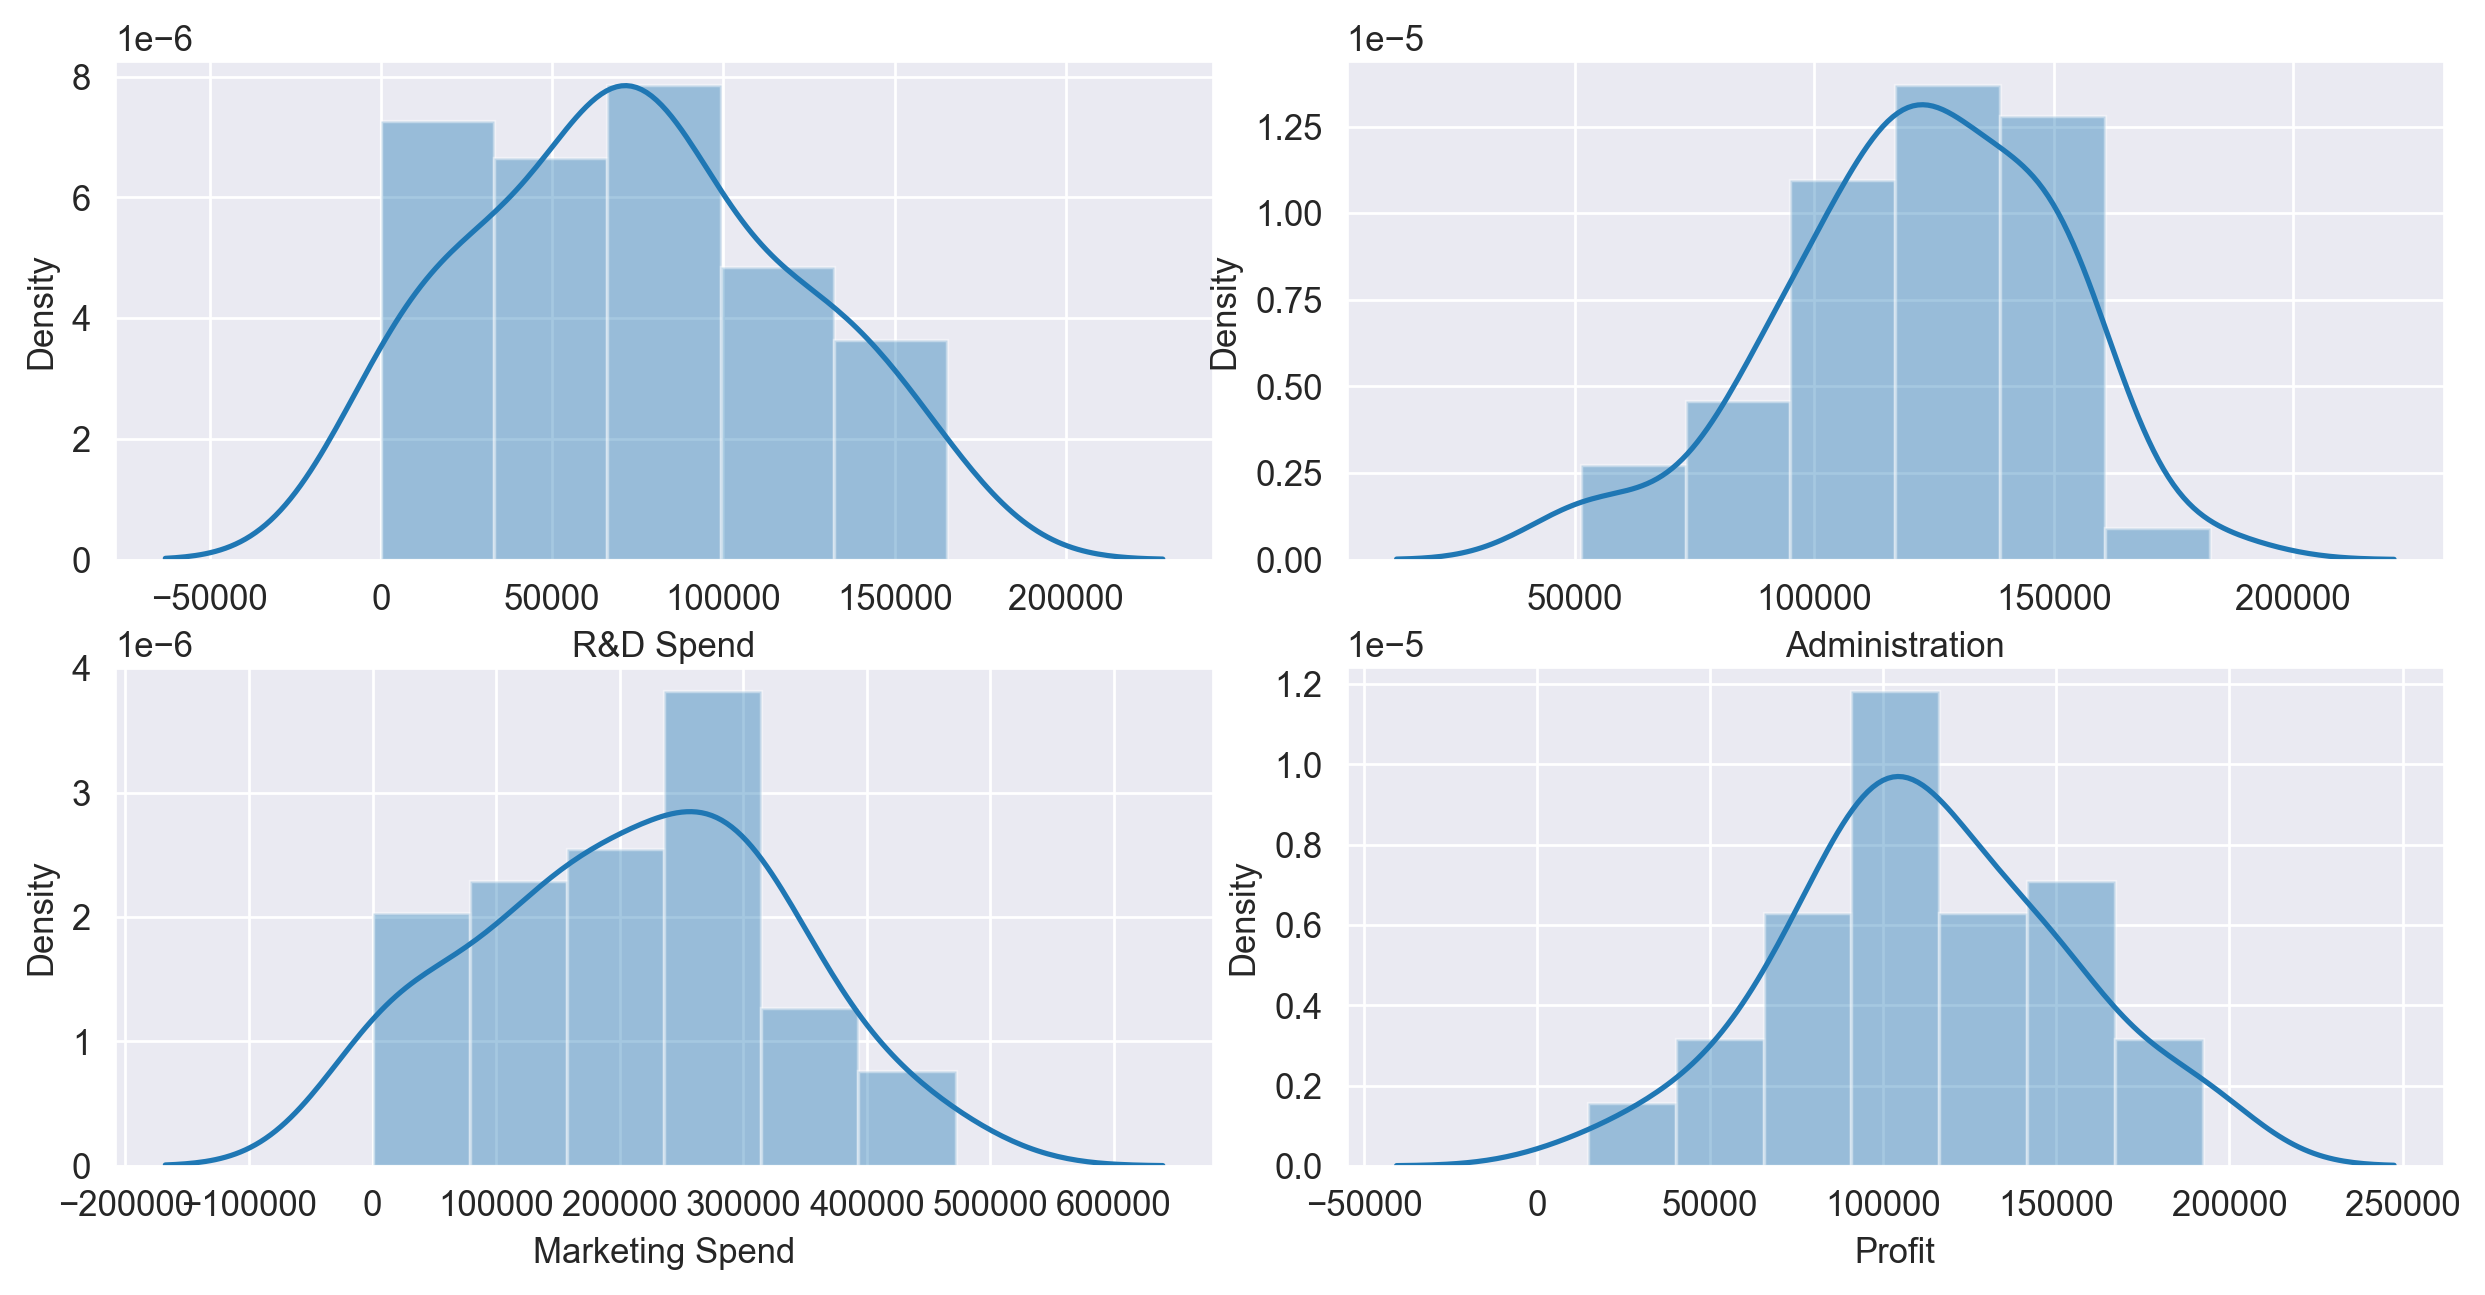

In [7]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.distplot(st['R&D Spend'], ax = ax[0,0])
sns.distplot(st['Administration'], ax = ax[0,1])
sns.distplot(st['Marketing Spend'], ax = ax[1,0])
sns.distplot(st['Profit'], ax = ax[1,1])

<AxesSubplot:ylabel='State'>

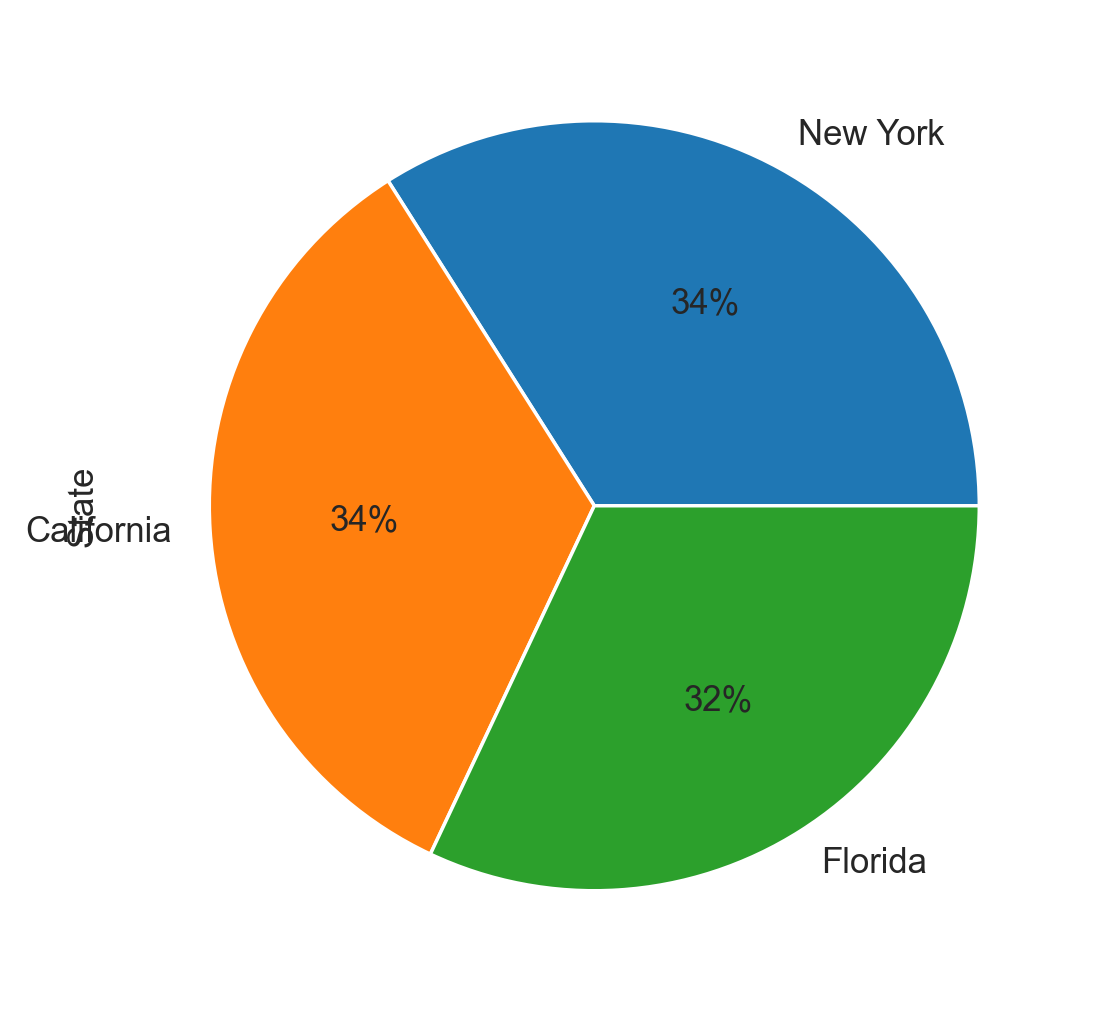

In [8]:
st['State'].value_counts().plot(kind='pie',autopct='%.0f%%')

In [9]:
fig = px.scatter_3d(x = st['R&D Spend'], y = st['Administration'], z = st['Profit'], color = st['State'])
fig.show()

### Correlation Analysis

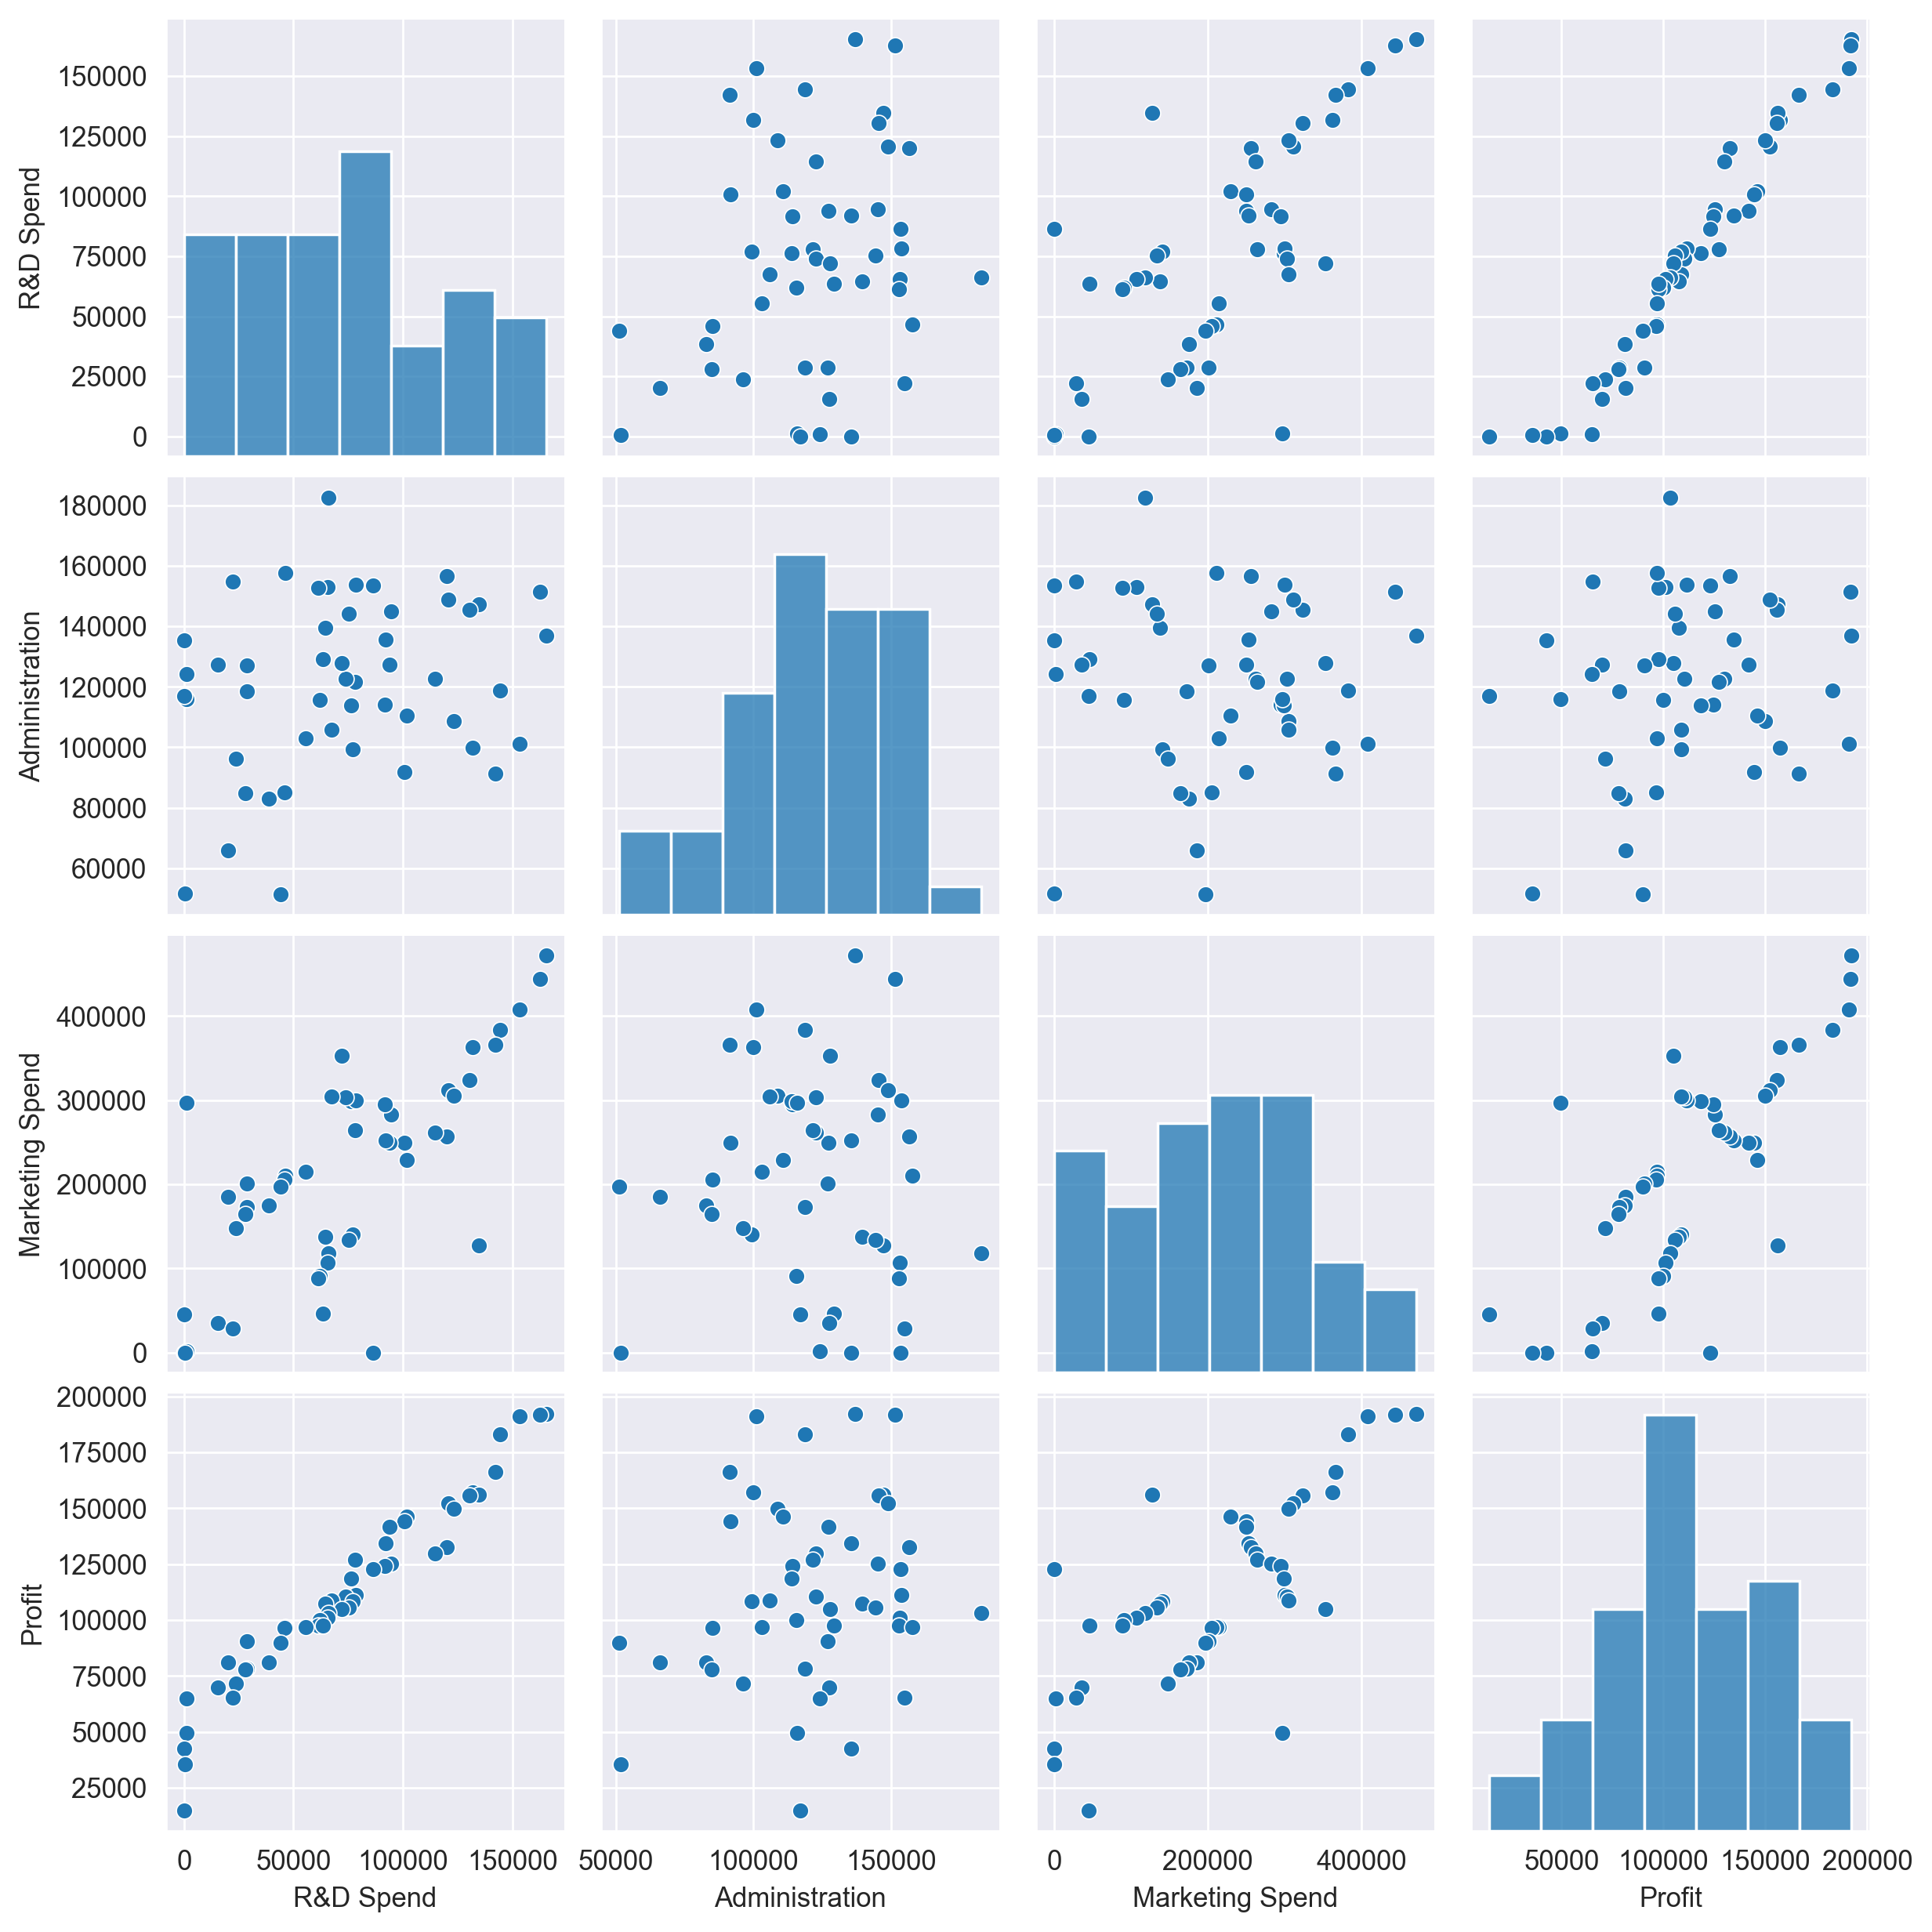

In [10]:
sns.pairplot(data= st)

In [11]:
st.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

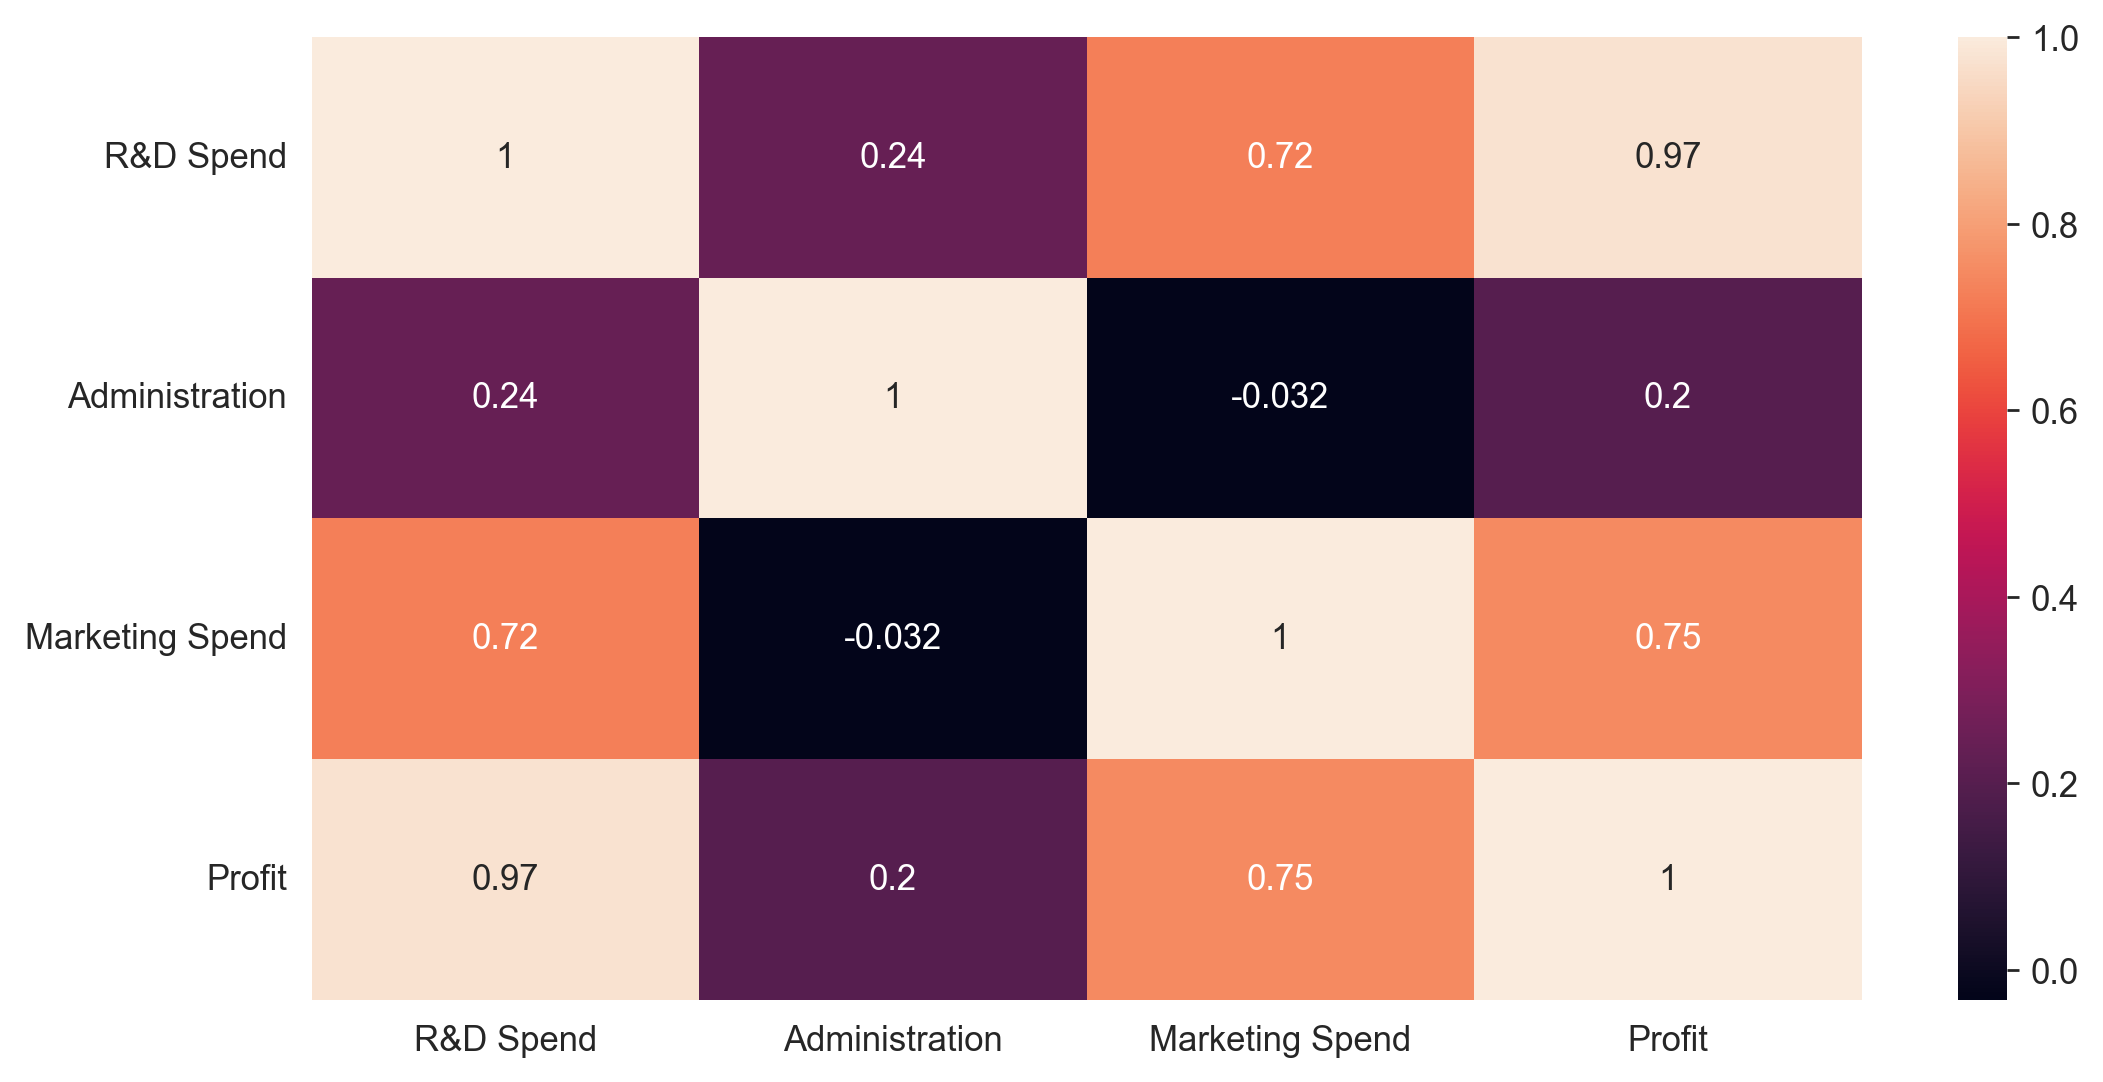

In [12]:
sns.heatmap(st.corr(), annot=True, )

- As we can see there is strong positive(+Ve) relationship between R&D Spend and Marketing Spend.

### Checking for Duplicated Values

In [13]:
st[st.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


- There are no duplicate vale in are dataset

### Outlier Detection

In [14]:
def remove_outlier(st,col):
  q1 = st[col].quantile(0.25)
  q3 = st[col].quantile(0.75)
  iqr = q3-q1

  upper = q3 + (iqr*1.5)
  lower = q1 - (iqr*1.5)
  
  st = st[(st[col]>lower) & (st[col]<upper)]

  return st

In [15]:
st = remove_outlier(st,'Profit')

<AxesSubplot:xlabel='Profit'>

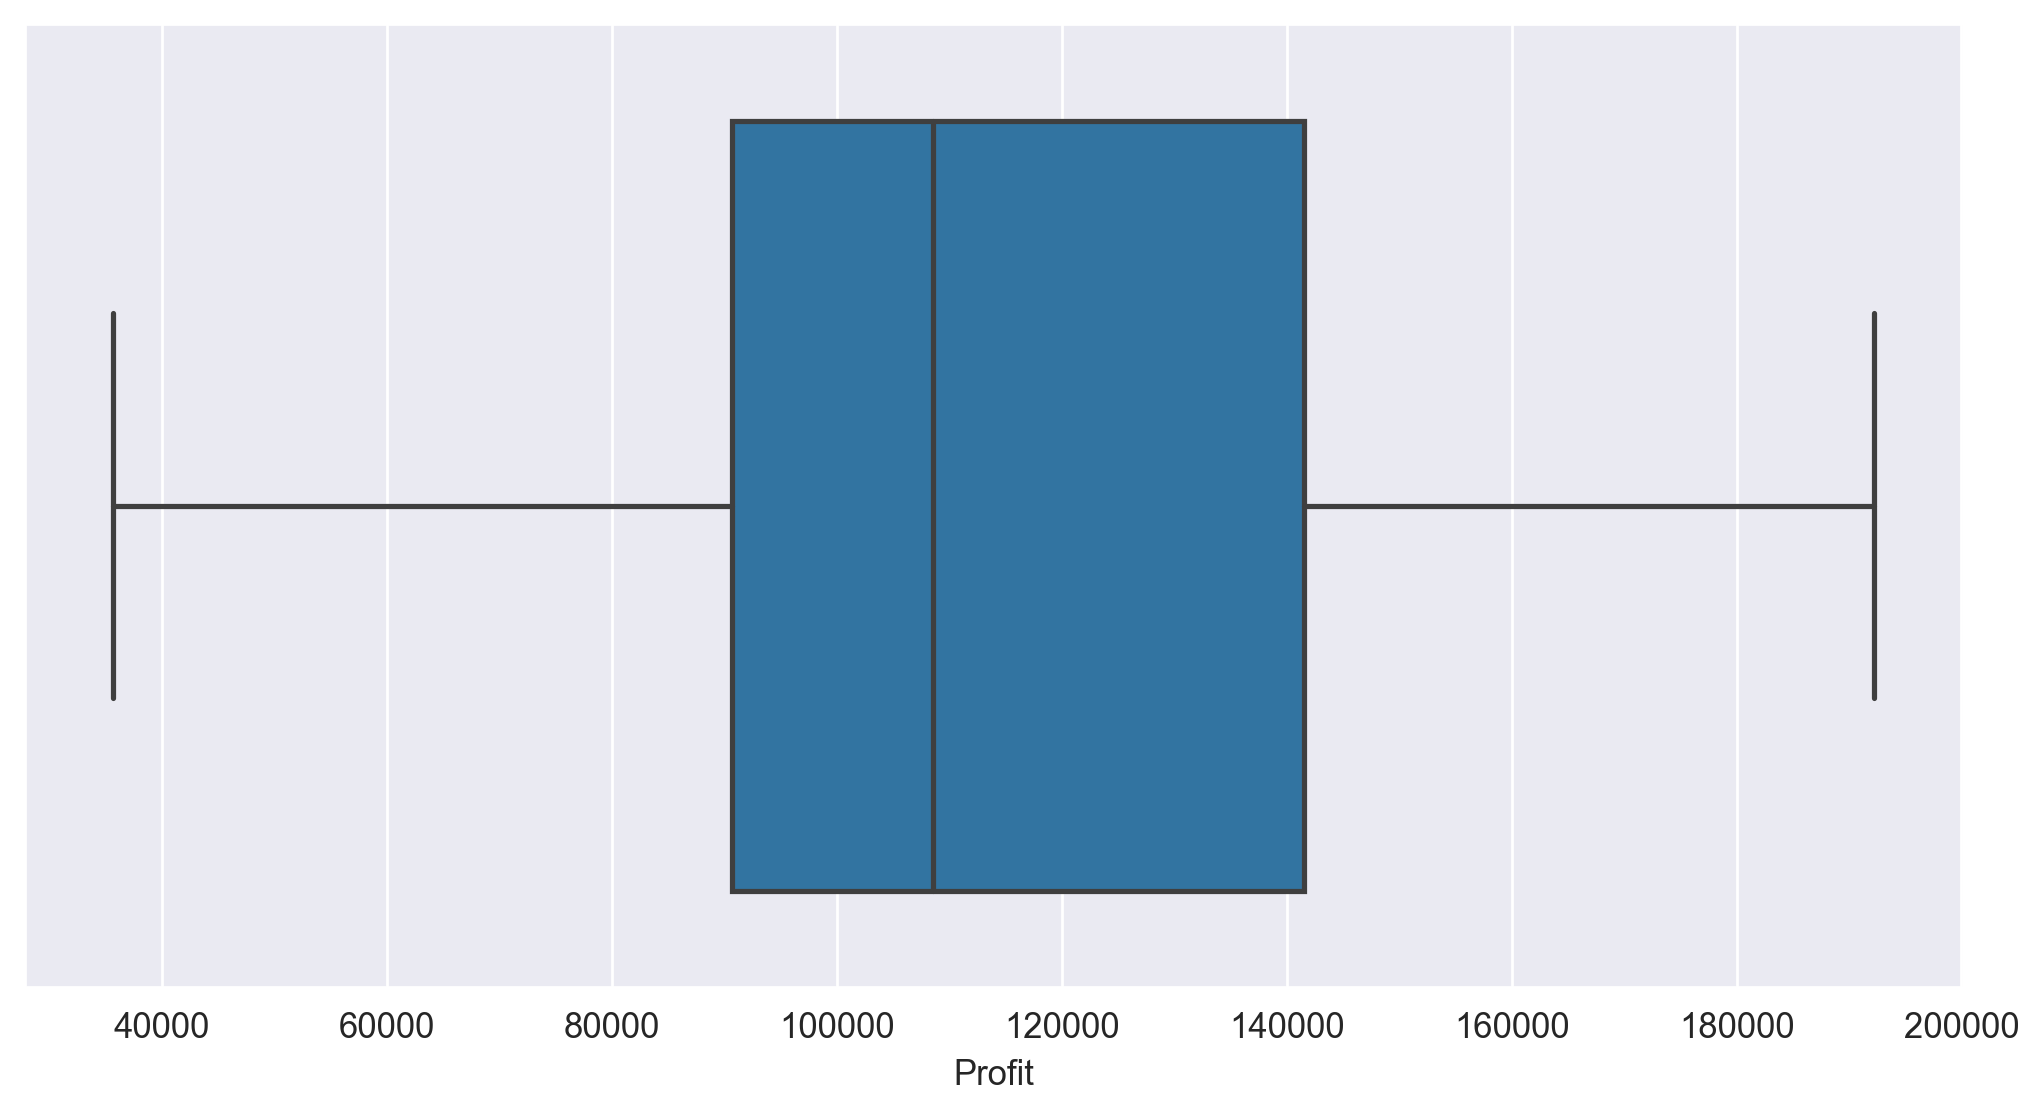

In [16]:
sns.boxplot(st['Profit'])

### Renaming the Column

In [17]:
st=st.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)

st.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Preparing Model From The Dataset

### Creating Model With Orignal Data

In [18]:
org_model = smf.ols('Profit~RDS+ADMS+MKTS',data=st).fit()

org_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        00:56:15   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADMS          -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- By using summary funtion we can see that Administration(ADMS) column is not contributing to are model, so can build Simple Linear Regression for Administration(ADMS) column to find is it contributing to are model or not

#### Building Simple Linear Regression for Administration(ADMS) column with Profit

In [19]:
profit_adms_model = smf.ols('Profit~ADMS', data=st).fit()

profit_adms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.156
Time:                        00:56:16   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
ADMS           0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF Value For All Column

In [20]:
rds_model = smf.ols('RDS~ADMS+MKTS', data = st).fit().rsquared
vif_rds = 1/(1-rds_model)

adms_model = smf.ols('ADMS~RDS+MKTS', data = st).fit().rsquared
vif_adms = 1/(1-adms_model)

mkts_model = smf.ols('MKTS~ADMS+RDS', data = st).fit().rsquared
vif_mkts = 1/(1-mkts_model)

In [21]:
vif = pd.DataFrame({
    'Columns' : ['rds','adms','mkts'],
    'VIF' : [vif_rds,vif_adms,vif_mkts]
})


vif

,Columns,VIF
0,rds,2.377754
1,adms,1.175172
2,mkts,2.239957


- BY calculating VIF value we found that Administration(ADMS) column can be kept.

### Performing Subset Selection

In [22]:
profit_2_column_model = smf.ols('Profit~RDS+MKTS', data=st).fit()

In [23]:

ss = pd.DataFrame({
    'model_name' : ['profit_all_model','profit_2_column_model'],
    'rsquared' : [org_model.rsquared,profit_2_column_model.rsquared],
    'aic_vale' : [org_model.aic,profit_2_column_model.aic],
})

ss

,model_name,rsquared,aic_vale
0,profit_all_model,0.961316,1020.565297
1,profit_2_column_model,0.961086,1018.856480


- we will be selecting org_model with has all columns, as it give better r squared value.

## Validating The Model

### Analyzing Residual With Help Of Q-Q Plot

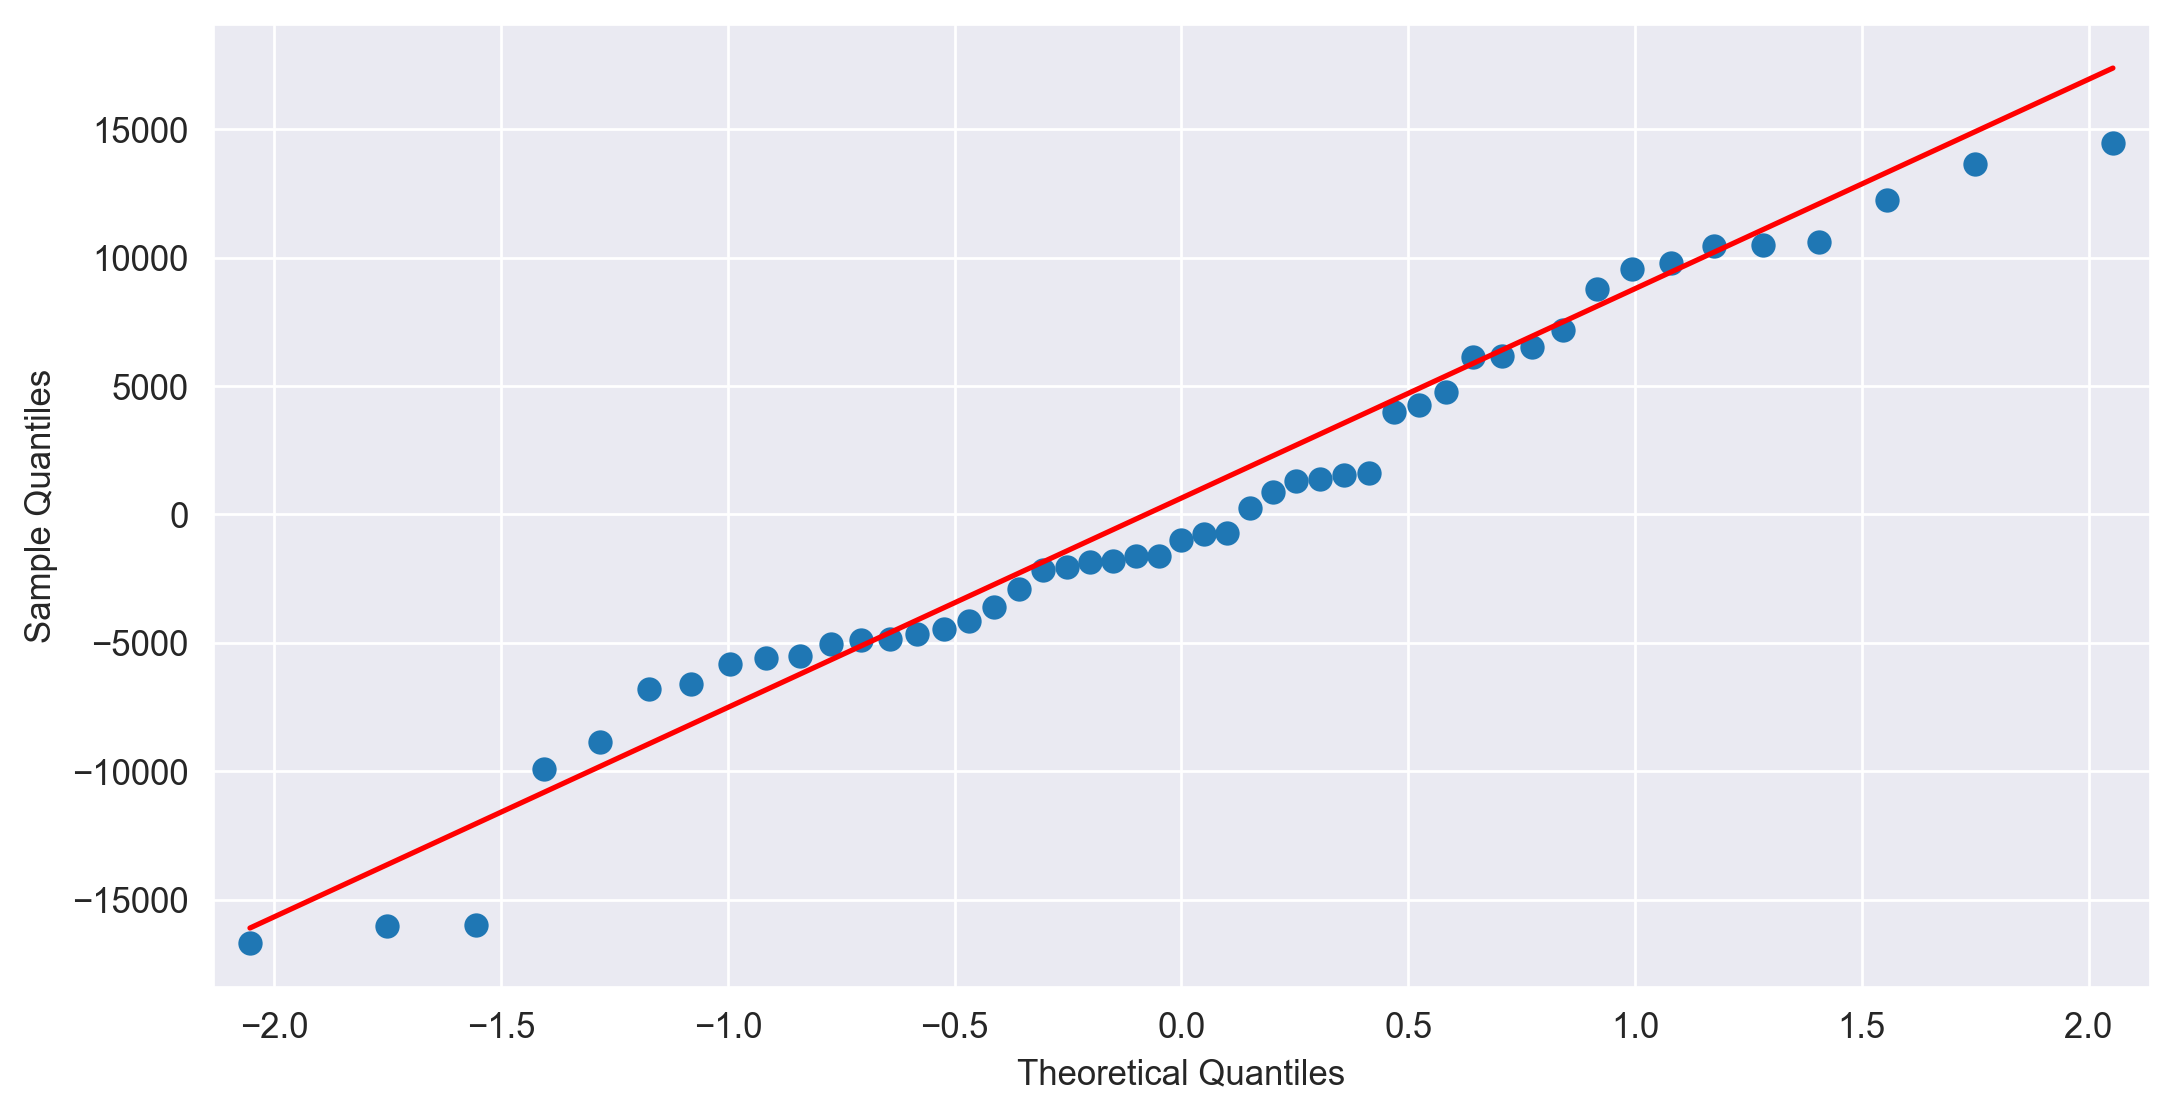

In [24]:
sm.qqplot(org_model.resid, line='q');

### Building Residual Plot

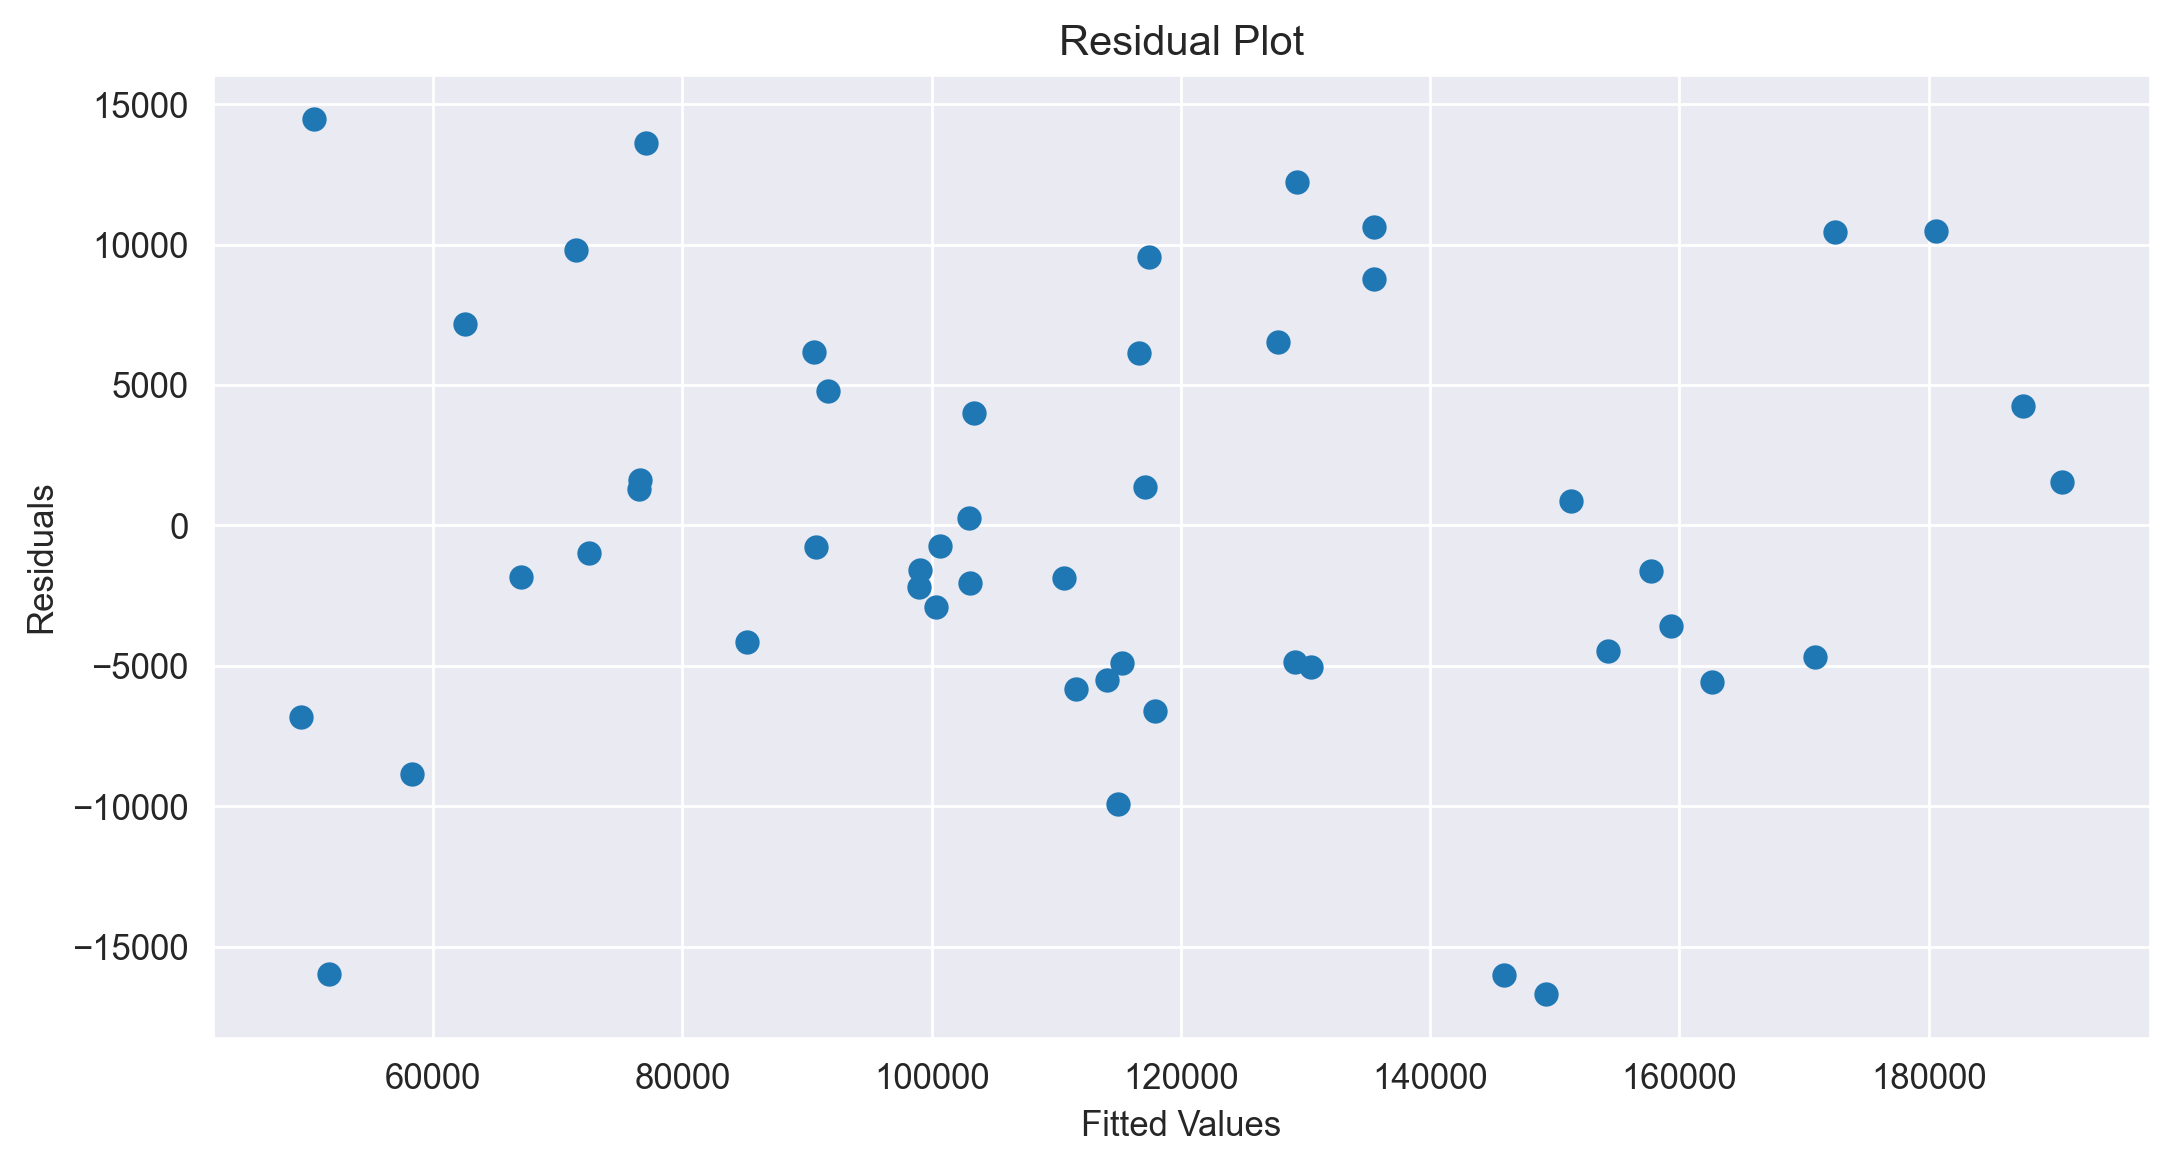

In [25]:
plt.scatter(org_model.fittedvalues,org_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Residual VS Regressor

#### Building With R&D Spend

eval_env: 1


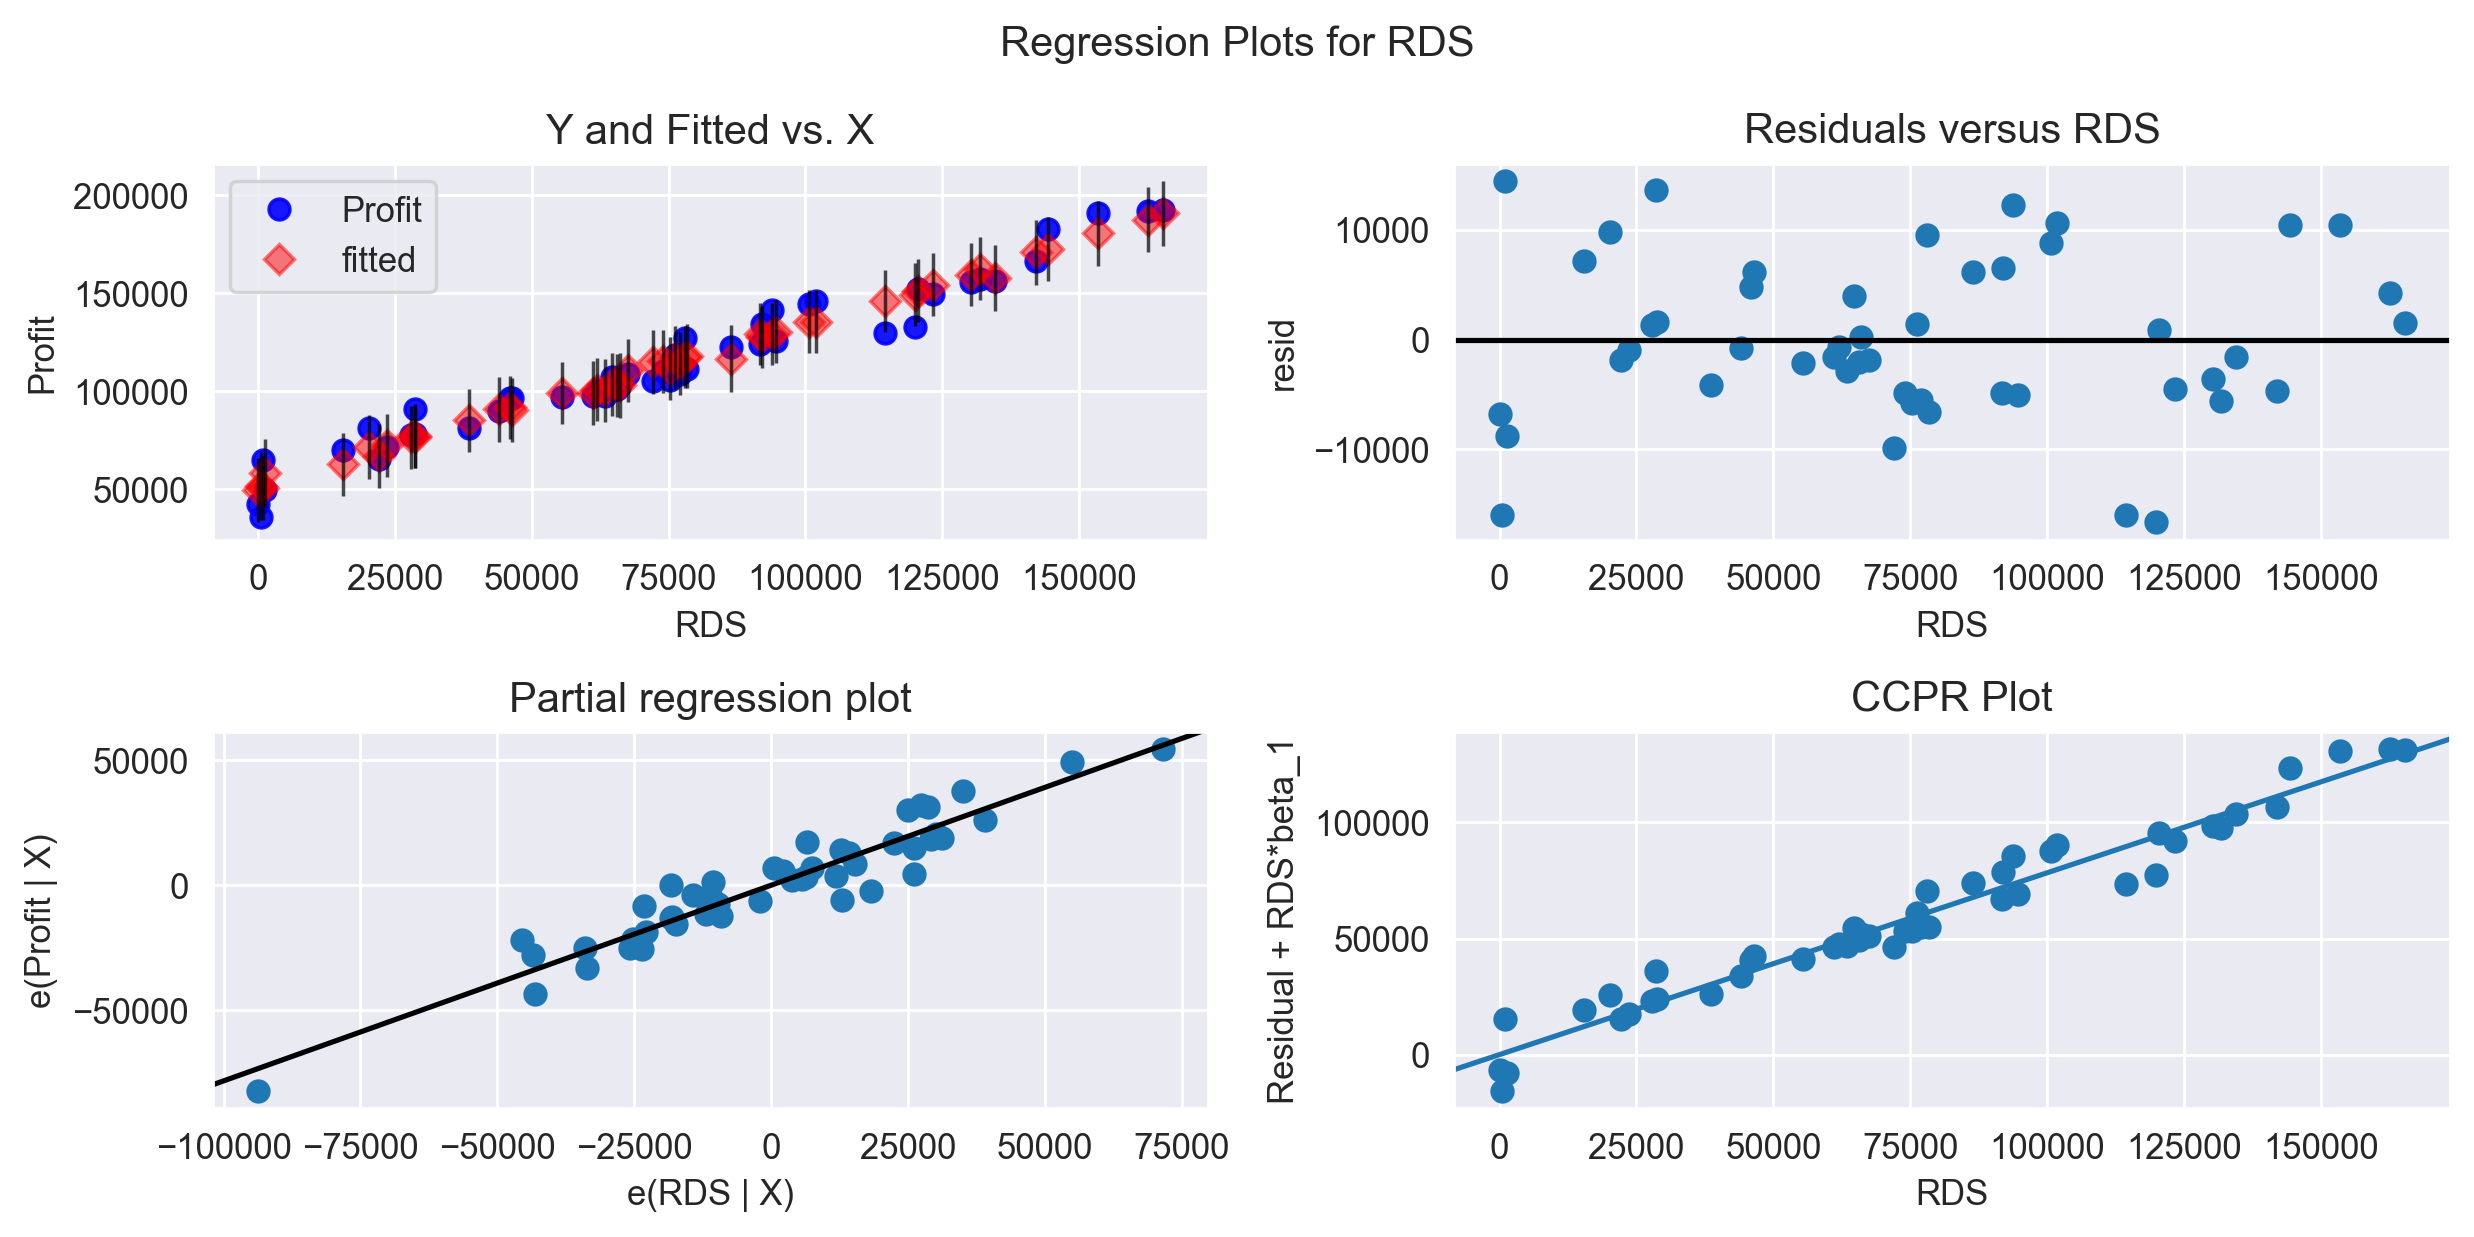

In [26]:
sm.graphics.plot_regress_exog(org_model,'RDS');
plt.tight_layout()

#### Building With Administration

eval_env: 1


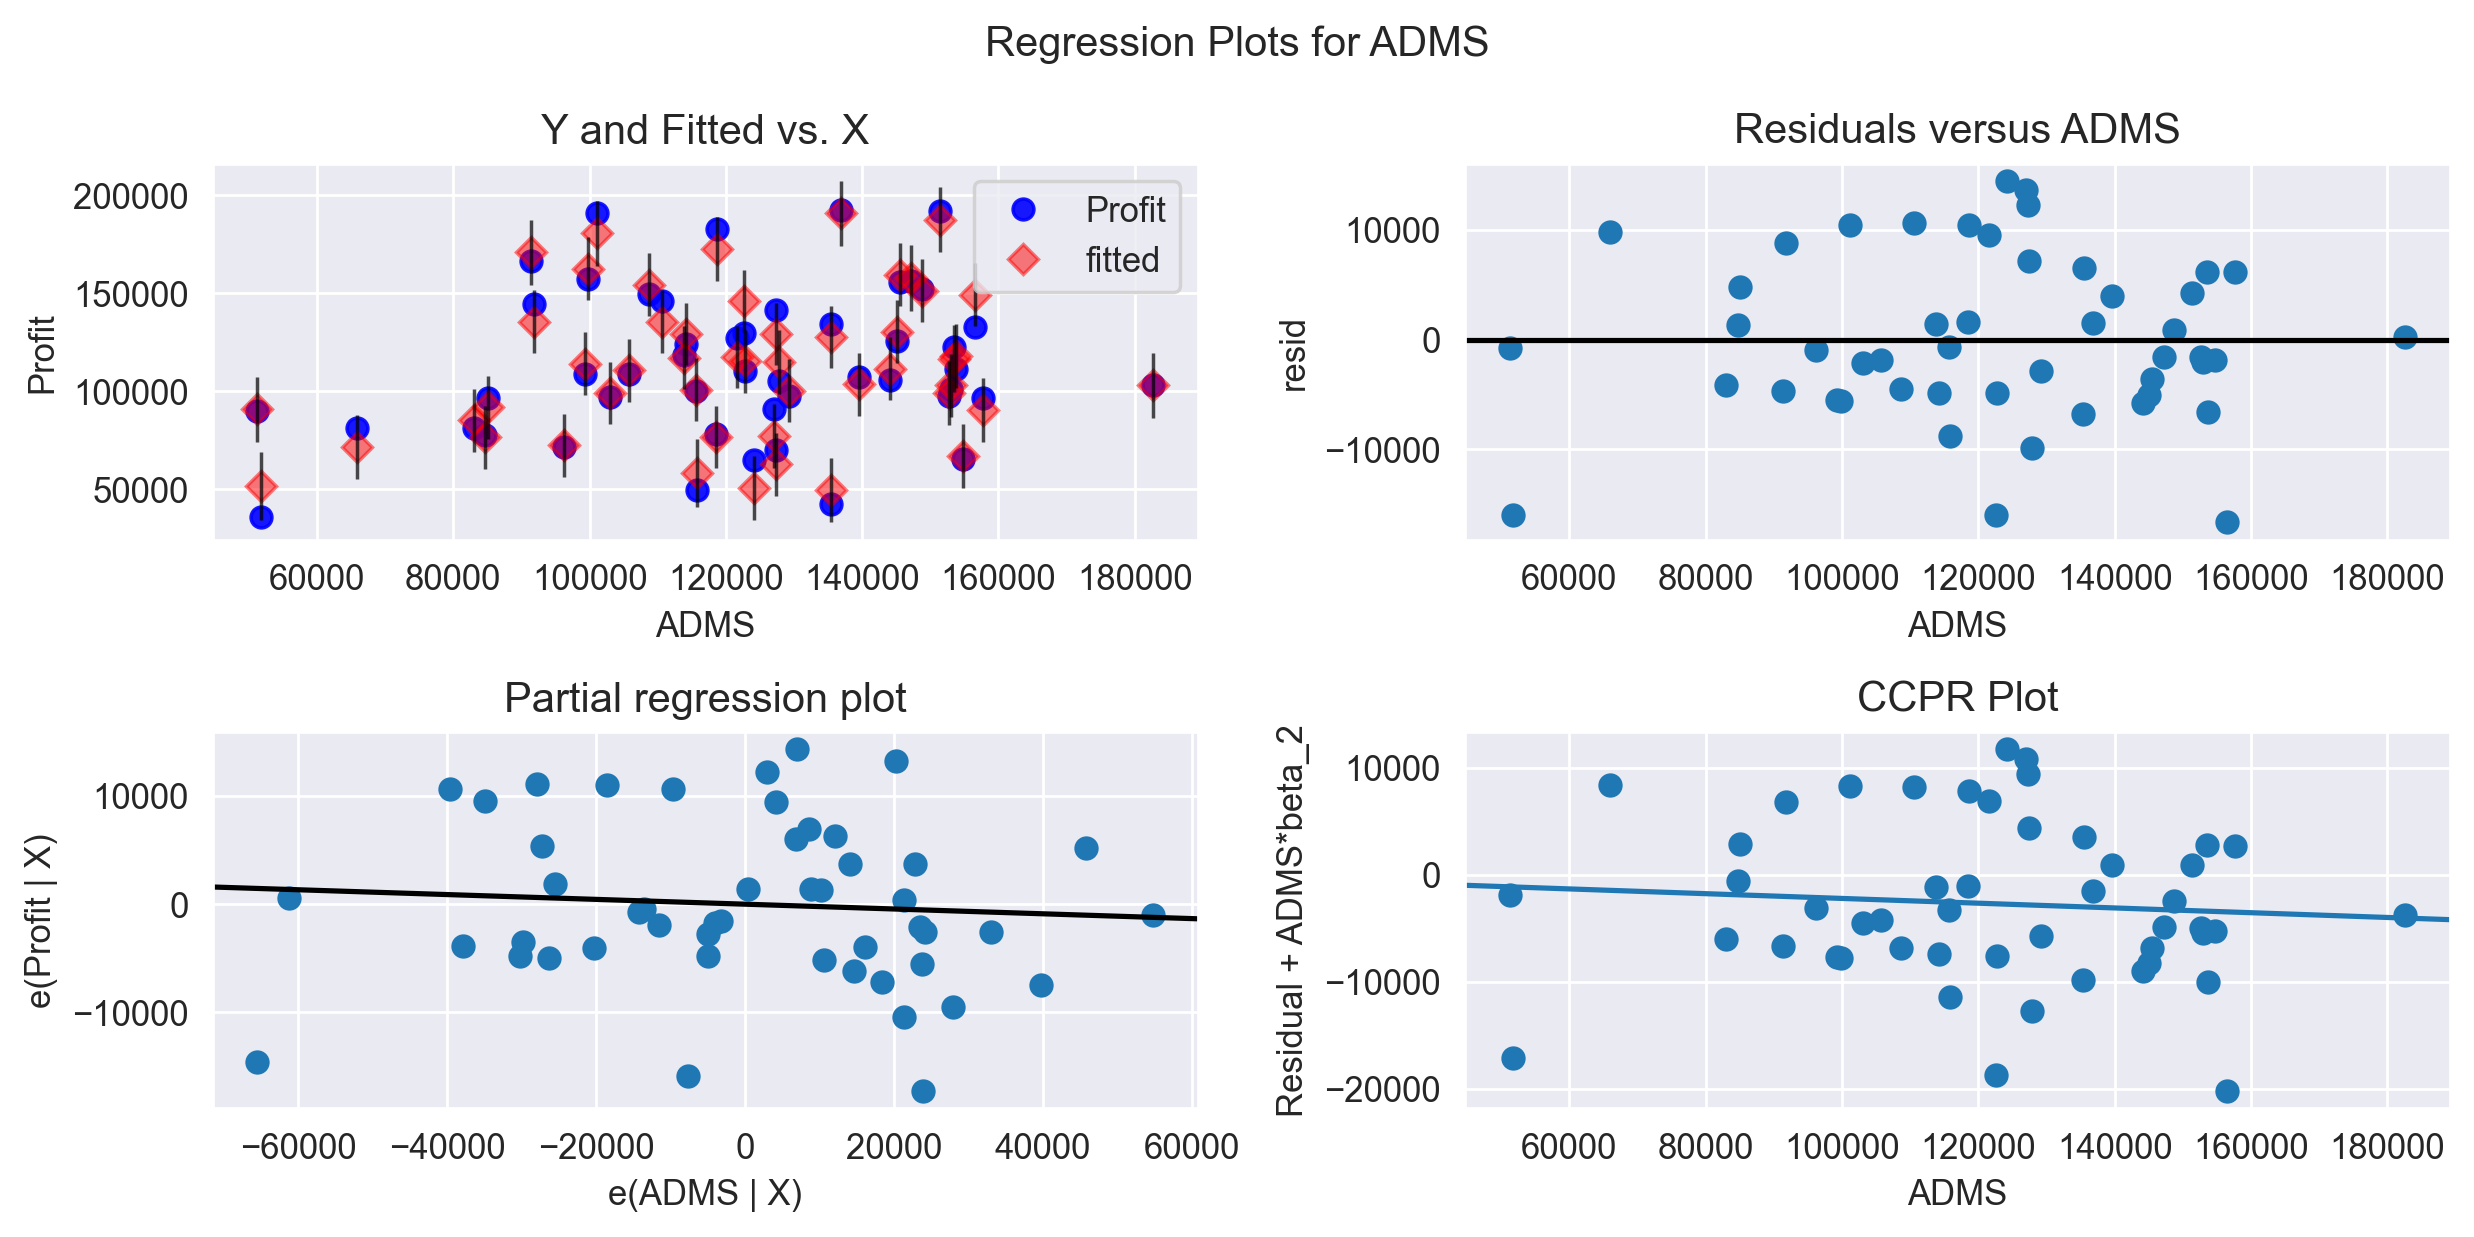

In [27]:
sm.graphics.plot_regress_exog(org_model,'ADMS');
plt.tight_layout()

#### Building With Marketing Spend

eval_env: 1


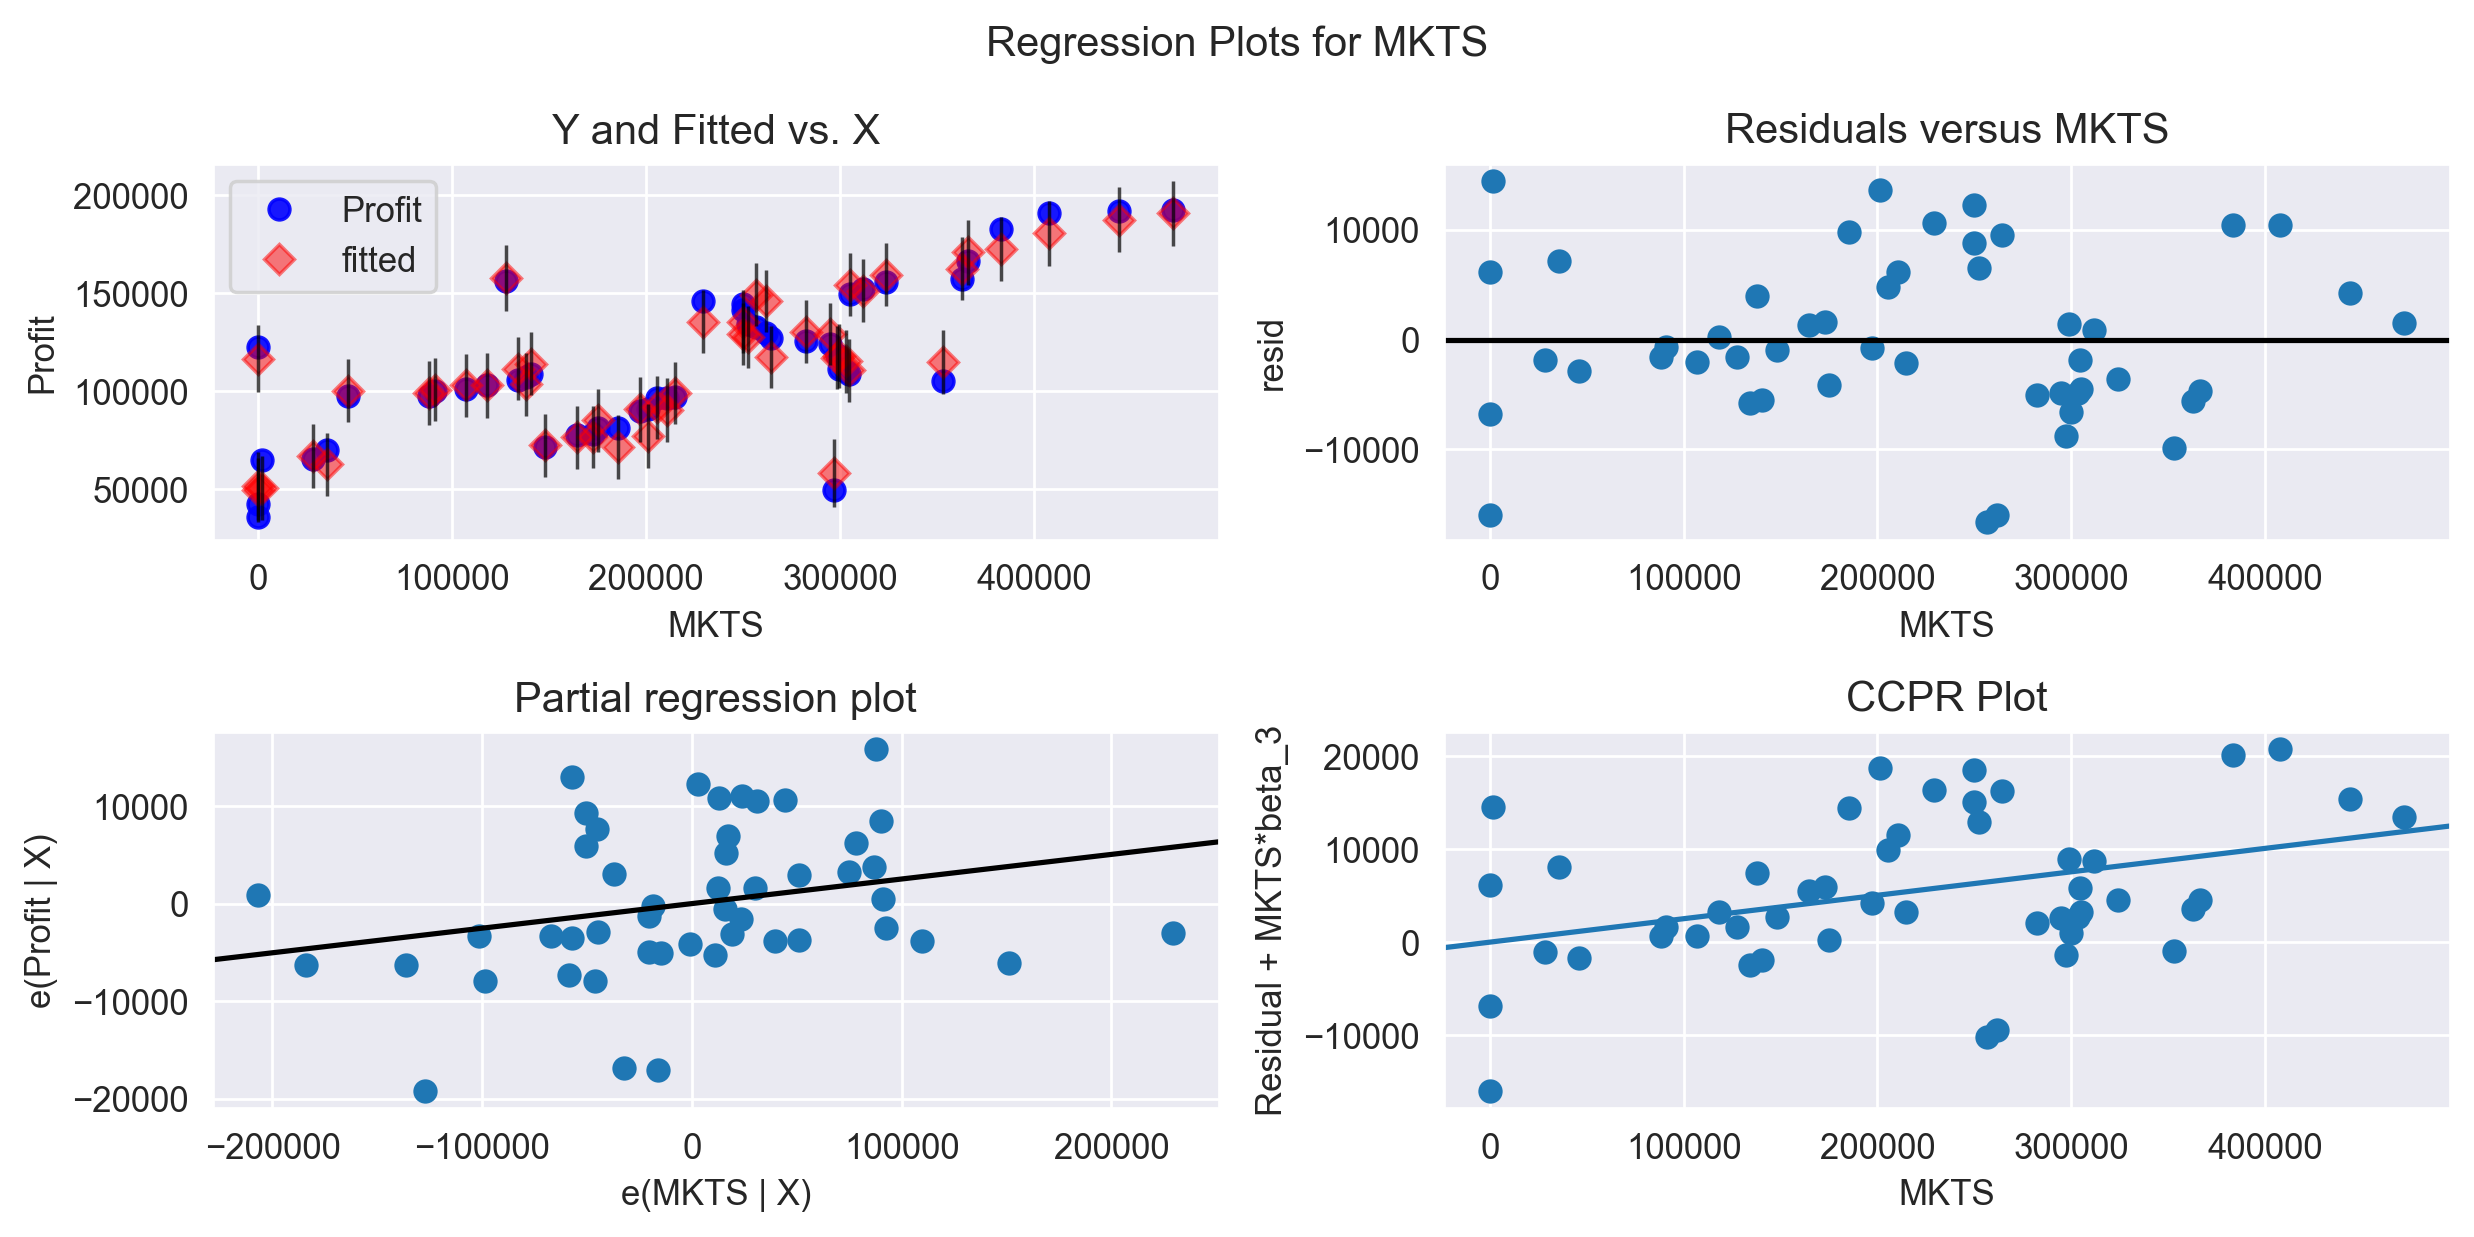

In [28]:
sm.graphics.plot_regress_exog(org_model,'MKTS');
plt.tight_layout()

## Executing Model Deletion Techniques

### Detecting Influencers Points

In [29]:
inf = org_model.get_influence()

#### Calculating Cook's Distance

In [30]:
c,p = inf.cooks_distance
c

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

#### Ploting Cooks Distance Graph

<StemContainer object of 3 artists>

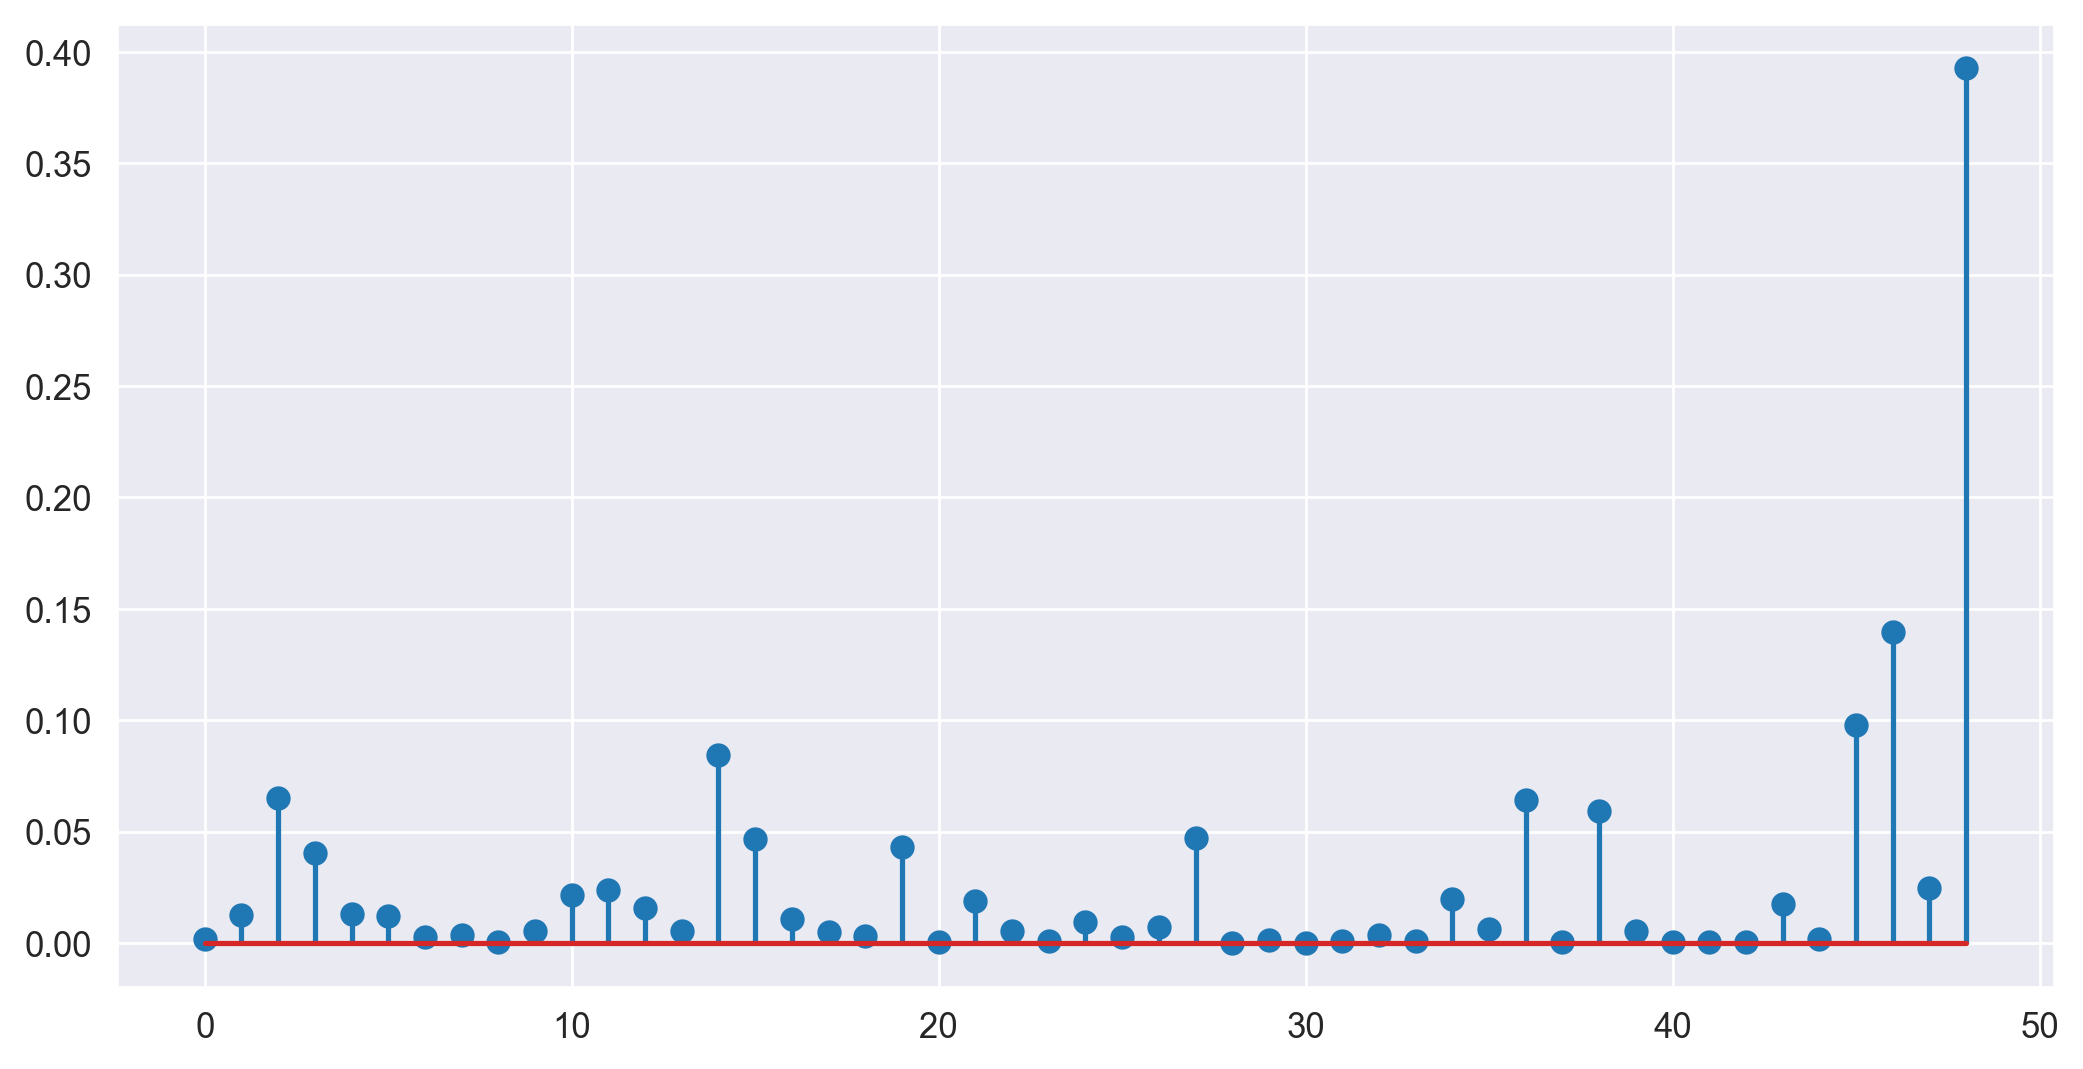

In [31]:
plt.stem(range(len(st)),c)

In [32]:
np.argmax(c), np.max(c)

(48, 0.39274420556321554)

In [33]:
st.iloc[[48]]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


#### Calculating Cutoff Value

In [34]:
k = len(st.columns)
n = len(st)

cut_off = 3*(k+1)/n
cut_off

0.3673469387755102

#### Ctrating Influence Plot

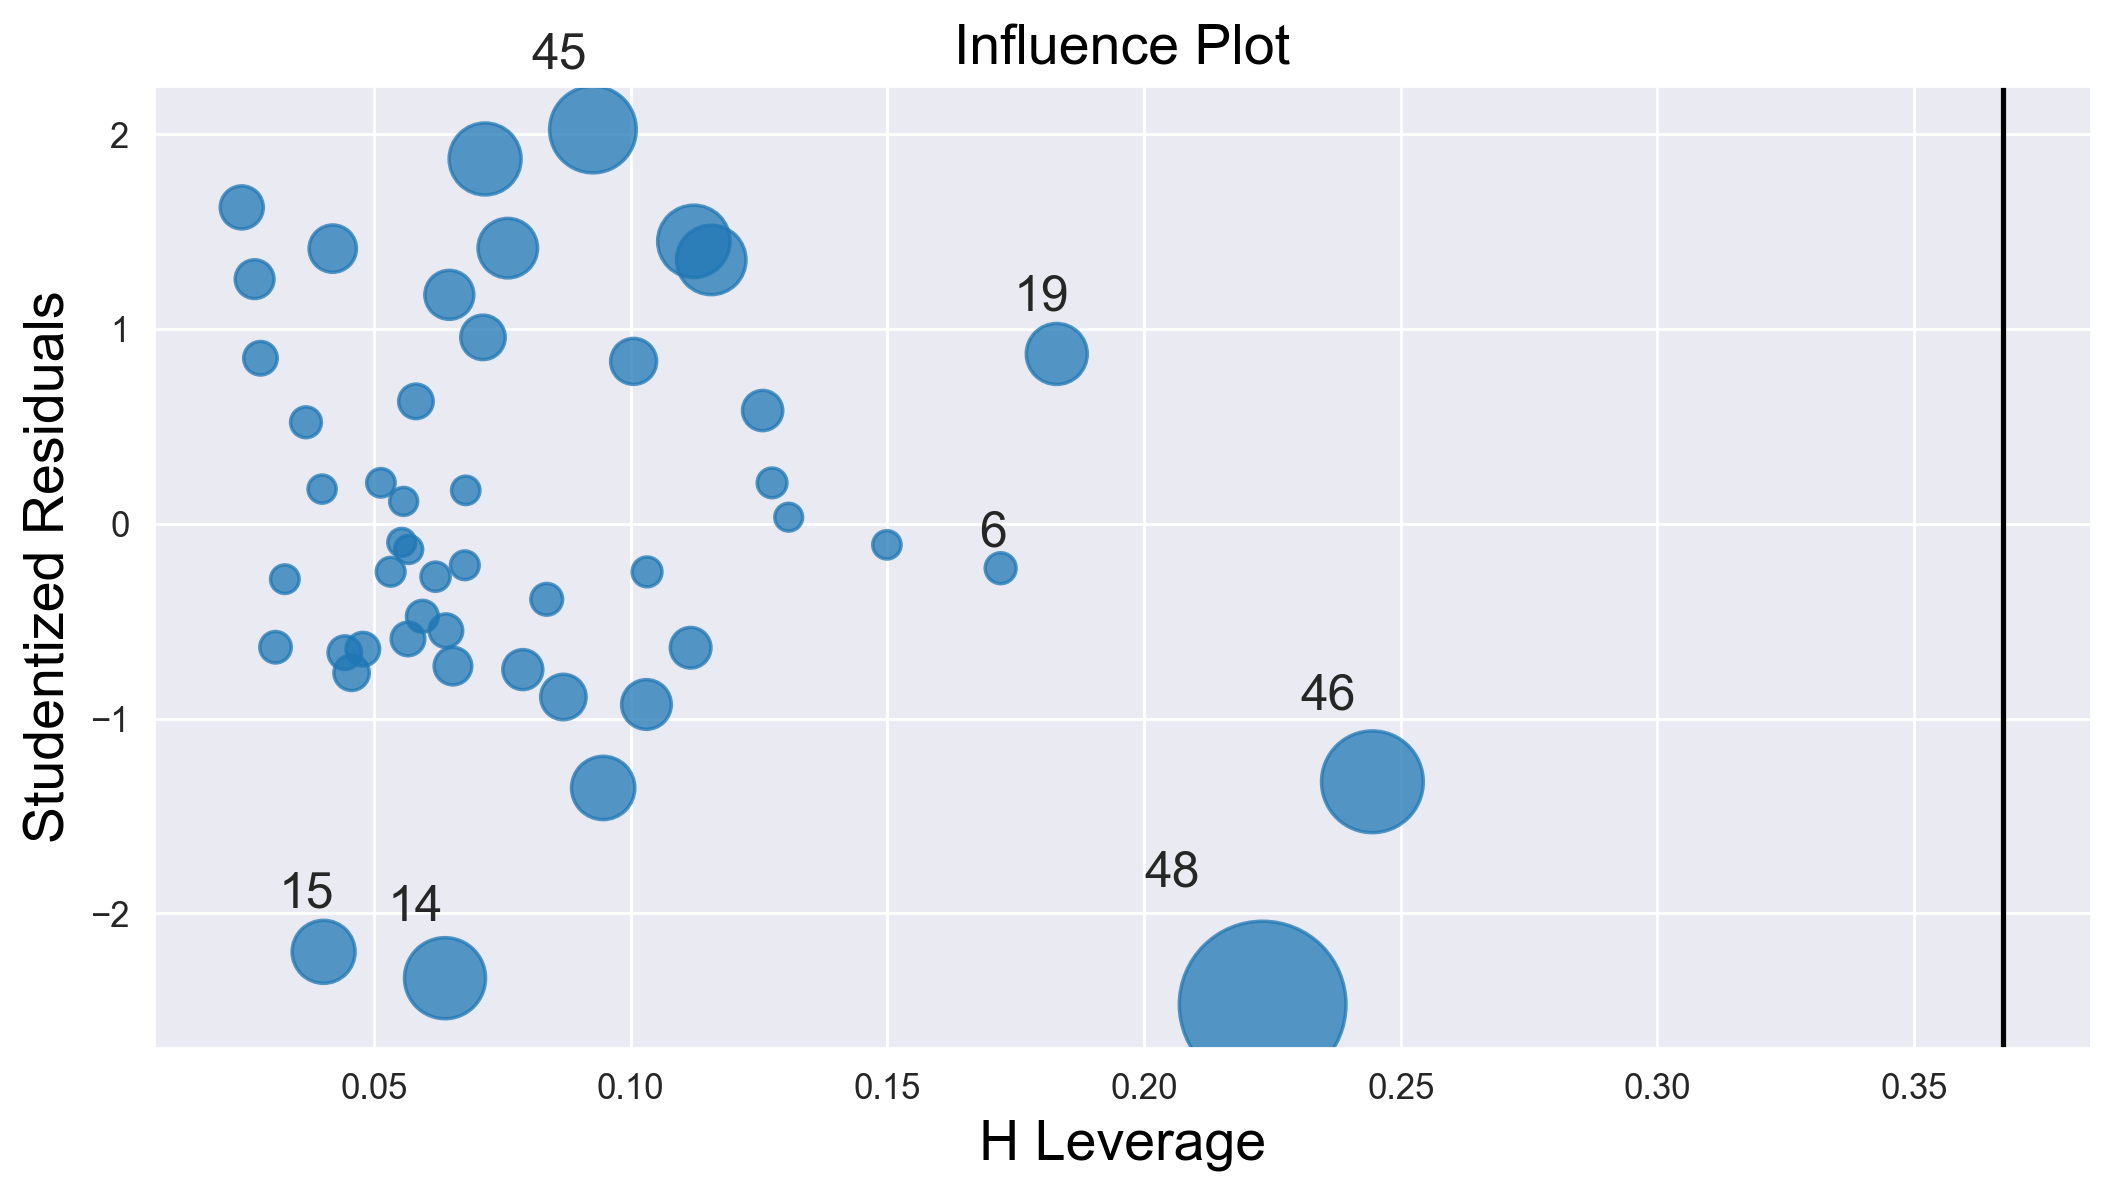

In [35]:
influence_plot(org_model)
plt.axvline(cut_off,color = 'black')

- As aren't any influencer points, so we finalize the model.

## Building The Final Model

In [36]:
final_model = smf.ols('Profit~RDS+ADMS+MKTS',data=st).fit()

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        00:56:55   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADMS          -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prediction For New Records

In [37]:
new_data = pd.DataFrame({
    'RDS' : [153441.51],
    'ADMS' : [151377.59],
    'MKTS' : [471784.10]
})

new_data

,RDS,ADMS,MKTS
0,153441.51,151377.59,471784.1


In [38]:
final_model.predict(new_data)

0    181071.462335
dtype: float64